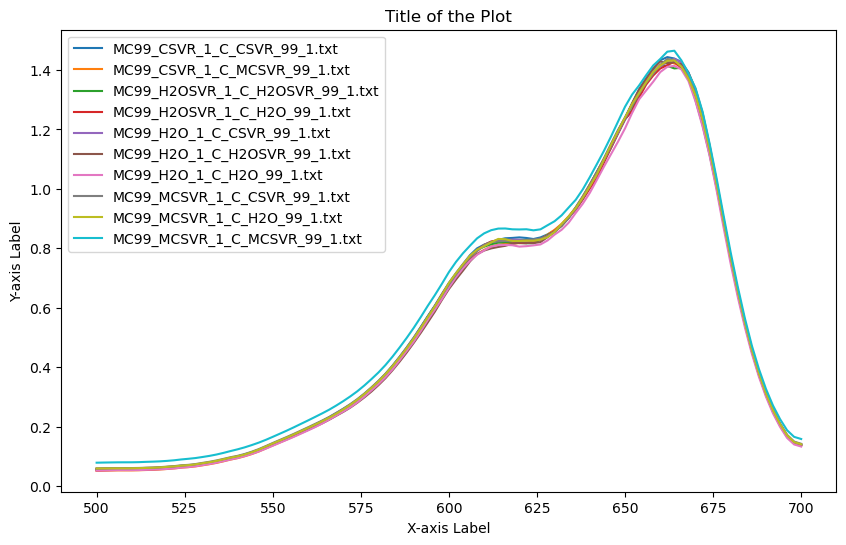

In [3]:
import os
import matplotlib.pyplot as plt

# Path to the folder containing .txt files
folder_path = r'C:\Users\ivan\WORK\Материа медика\Материа медика\Задача_этап 5_2\13-02-24'

# Get a list of all .txt files in the folder
txt_files = [f for f in os.listdir(folder_path) if f.endswith('.txt') 
             and 'journal' not in f.lower() and 'reaction' not in f.lower()]

# Initialize a plot
plt.figure(figsize=(10, 6))

# Loop through each .txt file
for txt_file in txt_files:
    # Extract data from the file
    file_path = os.path.join(folder_path, txt_file)
    with open(file_path, 'r') as file:
        data = file.readlines()
    x_values = []
    y_values = []
    for line in data:
        # Split the line and check if it contains both X and Y values
        parts = line.strip().split()
        if len(parts) == 2:
            x, y = map(float, parts)
            x_values.append(x)
            y_values.append(y)
    
    # Plot the data from the current file
    plt.plot(x_values, y_values, label=txt_file)

# Add labels and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.legend()

# Show the plot
plt.show()



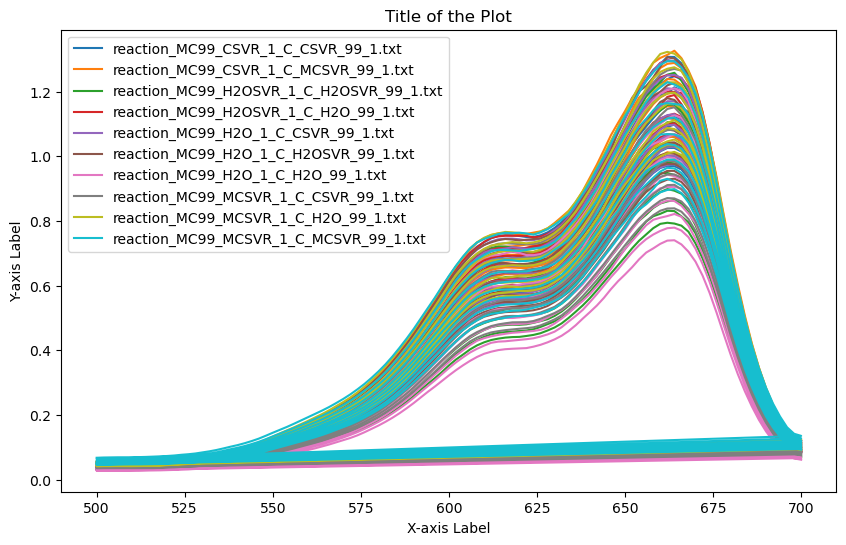

In [4]:
import os
import matplotlib.pyplot as plt

# Path to the folder containing .txt files
folder_path = r'C:\Users\ivan\WORK\Материа медика\Материа медика\Задача_этап 5_2\13-02-24'

# Get a list of all .txt files in the folder
txt_files = [f for f in os.listdir(folder_path) if f.endswith('.txt') 
             and 'reaction' in f.lower()]

# Initialize a plot
plt.figure(figsize=(10, 6))

# Loop through each .txt file
for txt_file in txt_files:
    # Extract data from the file
    file_path = os.path.join(folder_path, txt_file)
    with open(file_path, 'r') as file:
        data = file.readlines()
    x_values = []
    y_values = []
    for line in data:
        # Split the line and check if it contains both X and Y values
        parts = line.strip().split()
        if len(parts) == 2:
            x, y = map(float, parts)
            x_values.append(x)
            y_values.append(y)
    
    # Plot the data from the current file
    plt.plot(x_values, y_values, label=txt_file)

# Add labels and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.legend()

# Show the plot
plt.show()

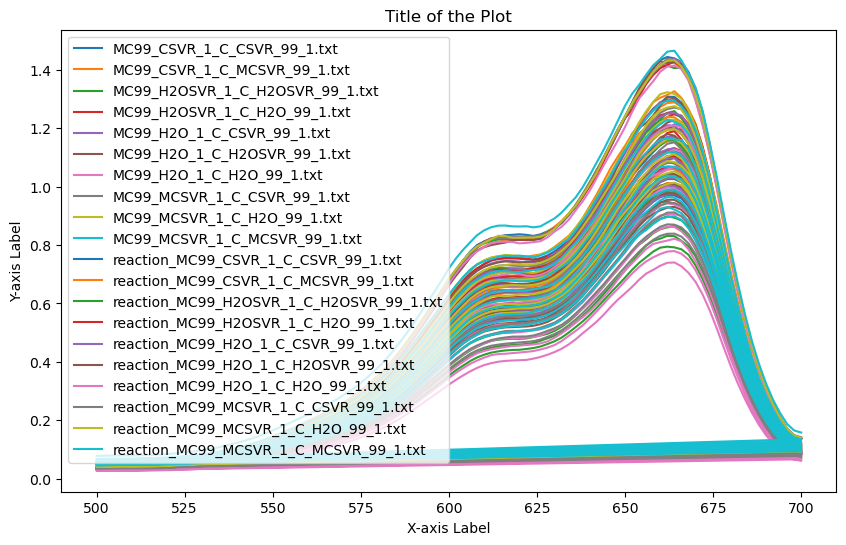

In [7]:
import os
import matplotlib.pyplot as plt

# Path to the folder containing .txt files
folder_path = r'C:\Users\ivan\WORK\Материа медика\Материа медика\Задача_этап 5_2\13-02-24'

# Get a list of all .txt files in the folder
txt_files = [f for f in os.listdir(folder_path) if f.endswith('.txt') and 'journal' not in f.lower()]

# Initialize a plot
plt.figure(figsize=(10, 6))

# Loop through each .txt file
for txt_file in txt_files:
    # Extract data from the file
    file_path = os.path.join(folder_path, txt_file)
    with open(file_path, 'r') as file:
        data = file.readlines()
        
    # Skip lines until reaching the data
    skip_lines = 0
    for line in data:
        if line.strip().isdigit():
            skip_lines += 1
        else:
            break
            
    # Extract x and y values
    x_values = []
    y_values = []
    for line in data[skip_lines:]:
        parts = line.strip().split()
        if len(parts) == 2:
            x, y = map(float, parts)
            x_values.append(x)
            y_values.append(y)
    
    # Plot the data from the current file
    plt.plot(x_values, y_values, label=txt_file)

# Add labels and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.legend()

# Show the plot
plt.show()


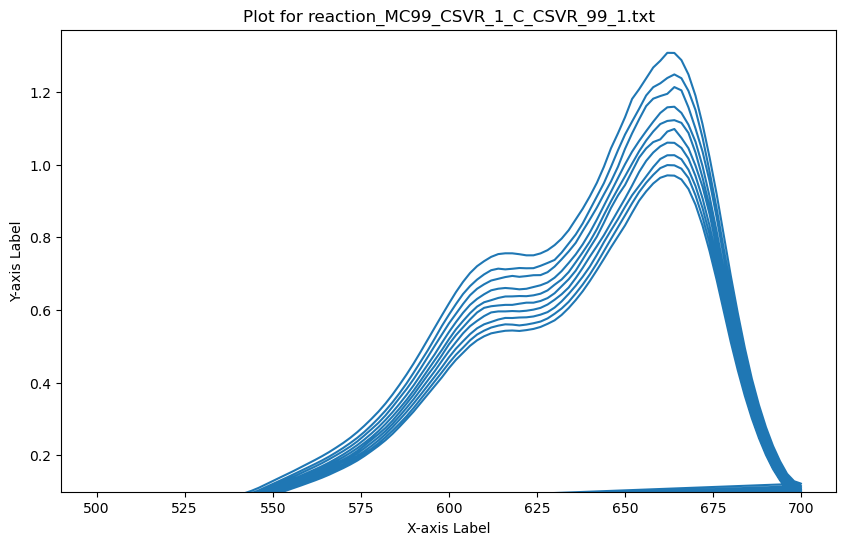

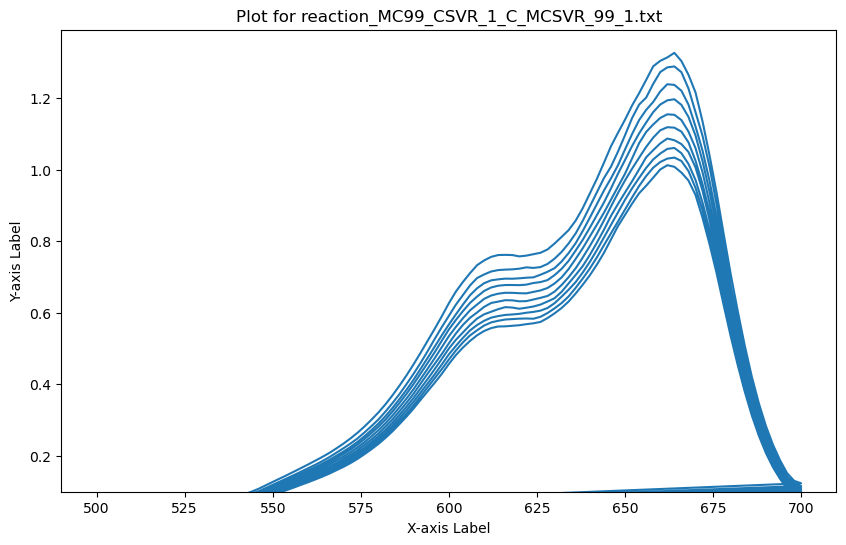

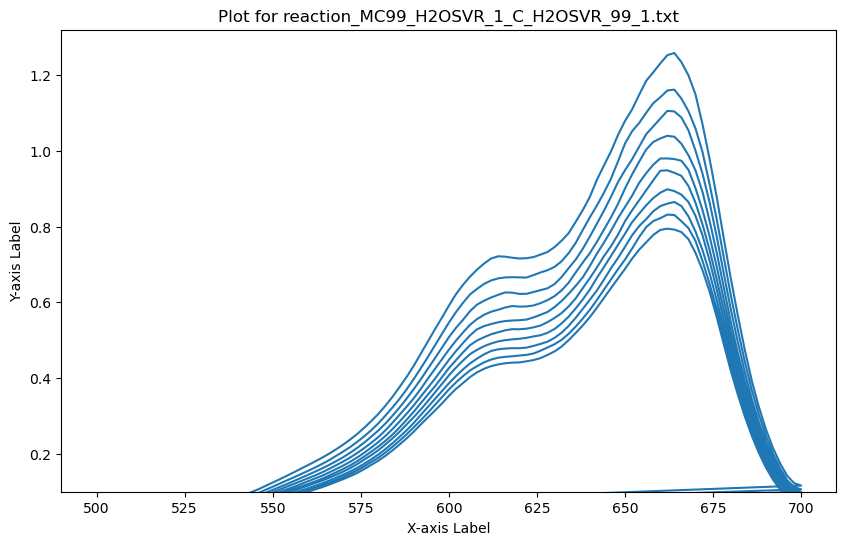

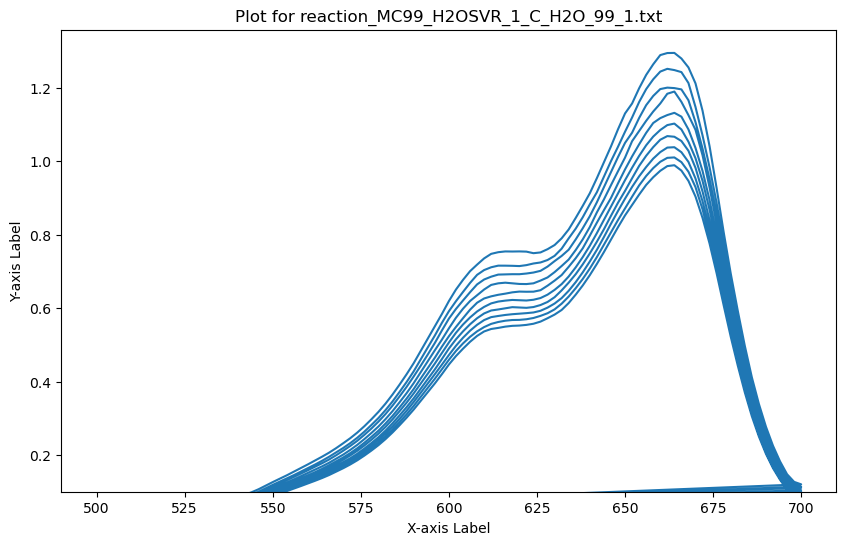

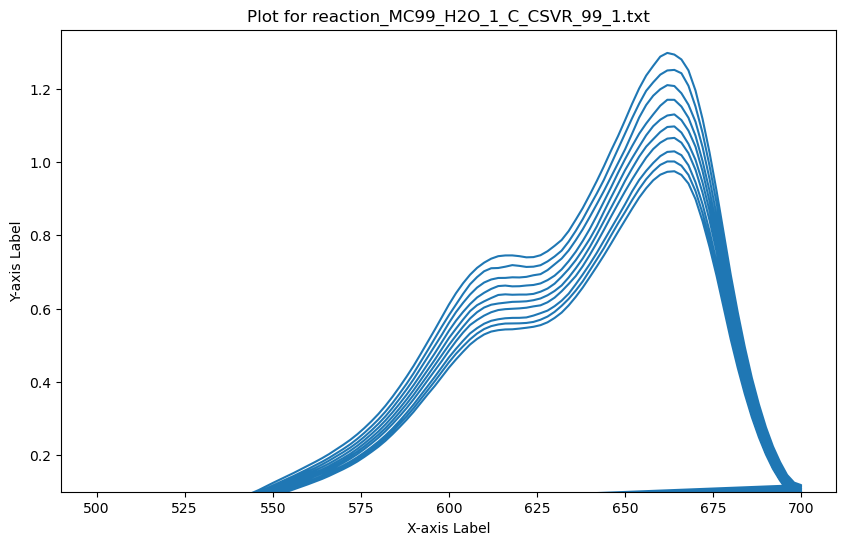

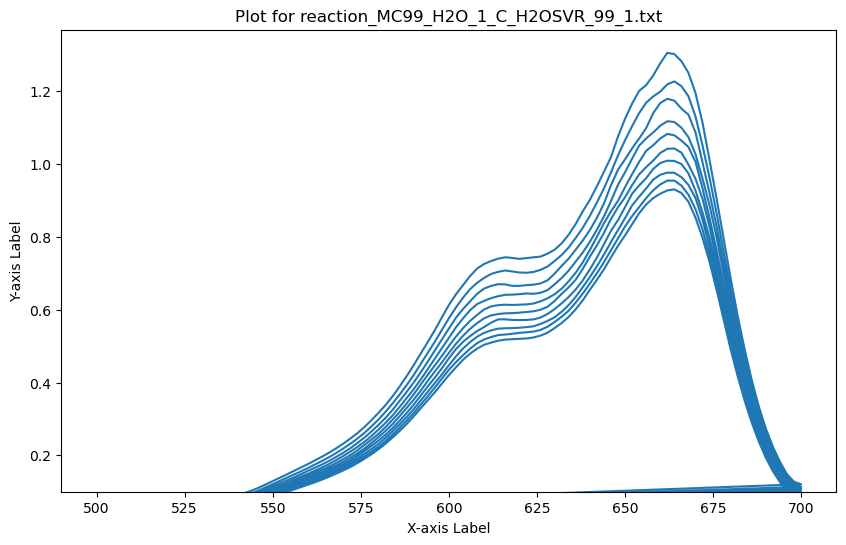

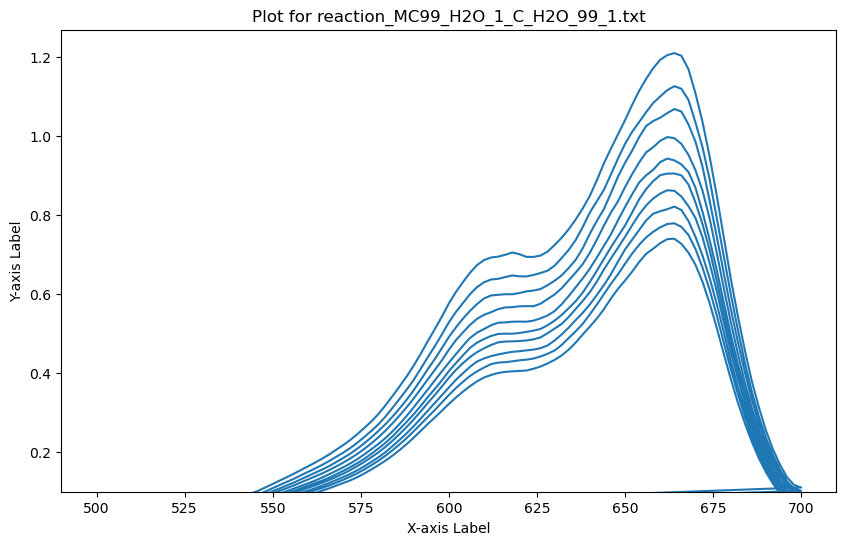

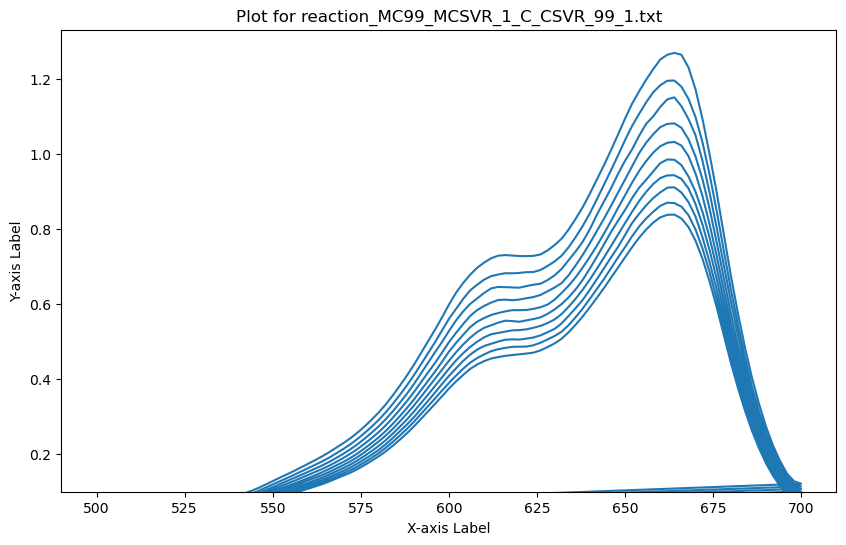

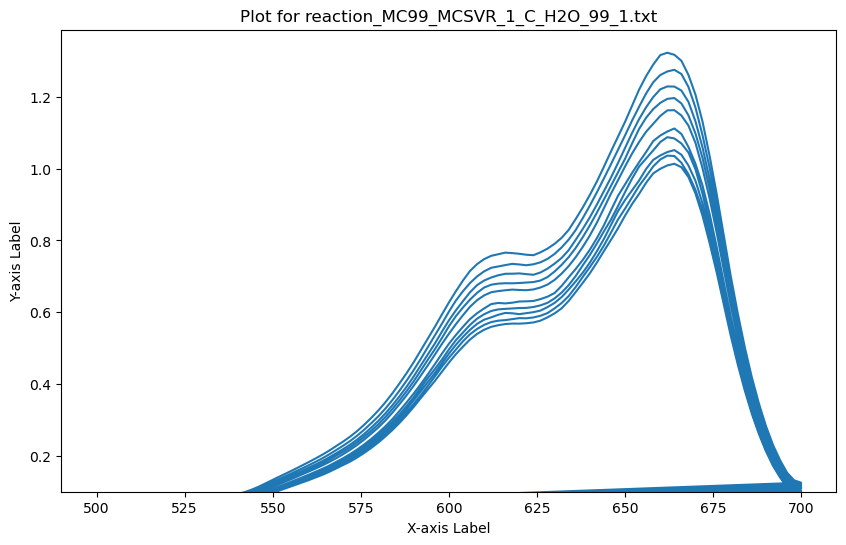

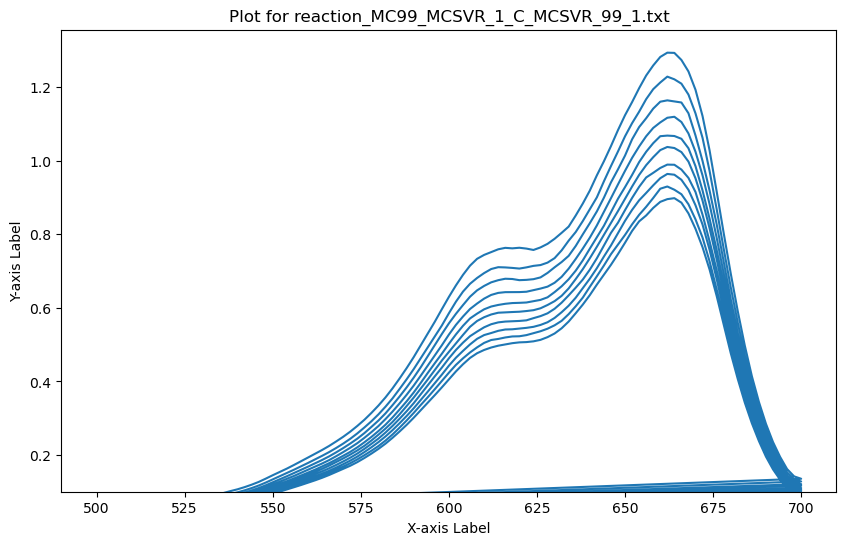

In [12]:
import os
import matplotlib.pyplot as plt

# Path to the folder containing .txt files
folder_path = r'C:\Users\ivan\WORK\Материа медика\Материа медика\Задача_этап 5_2\13-02-24'

# Get a list of all .txt files in the folder
txt_files = [f for f in os.listdir(folder_path) if f.endswith('.txt') and 'reaction' in f.lower()]

# Loop through each .txt file
for txt_file in txt_files:
    # Initialize a plot for the current file
    plt.figure(figsize=(10, 6))
    
    # Extract data from the file
    file_path = os.path.join(folder_path, txt_file)
    with open(file_path, 'r') as file:
        data = file.readlines()
        
    # Skip lines until reaching the data
    skip_lines = 0
    for line in data:
        if line.strip().isdigit():
            skip_lines += 1
        else:
            break
            
    # Extract x and y values
    x_values = []
    y_values = []
    for line in data[skip_lines:]:
        parts = line.strip().split()
        if len(parts) == 2:
            x, y = map(float, parts)
            x_values.append(x)
            y_values.append(y)
    
    # Plot the data from the current file
    plt.plot(x_values, y_values)
    
    # Add labels and title
    plt.xlabel('X-axis Label')
    plt.ylabel('Y-axis Label')
    plt.title(f'Plot for {txt_file}')
    # Set y-axis limit excluding zero
    plt.ylim(ymin=0.1)
    
    # Show the plot
    plt.show()


In [16]:
import pandas as pd

def process_txt_to_excel(input_file, output_file):
    # Read the data from the text file
    with open(input_file, 'r') as file:
        lines = file.readlines()

    # Initialize dictionary to hold the data
    data = {}

    # Process the lines
    current_graph = None
    for line in lines:
        if line.startswith('График'):
            current_graph = line.strip()
            data[current_graph] = []
        elif line.strip().replace('.', '').replace(' ', '').isdigit():
            x, y = map(float, line.split())
            data[current_graph].append((x, y))

    # Create DataFrame
    df_list = []
    for graph, values in data.items():
        df = pd.DataFrame({graph: dict(values)})
        df.insert(0, 'wavelength', [x[0] for x in values])
        df_list.append(df)

    # Merge DataFrames on the 'wavelength' column
    merged_df = pd.concat(df_list).groupby('wavelength').first().reset_index()

    # Save DataFrame to Excel
    merged_df.to_excel(output_file, index=False)

# Example usage:
# Path to the folder containing .txt files
input_file = r'C:\Users\ivan\WORK\Материа медика\Материа медика\Задача_этап 5_2\13-02-24\reaction_MC99_CSVR_1_C_CSVR_99_1.txt'
#input_file = 'data.txt'
output_file = 'output.xlsx'
process_txt_to_excel(input_file, output_file)


In [19]:
import os
import pandas as pd

def process_txt_to_excel(input_folder, output_folder, keyword):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each .txt file in the input folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith('.txt') and keyword in file_name:
            input_file = os.path.join(input_folder, file_name)
            output_file = os.path.join(output_folder, os.path.splitext(file_name)[0] + '.xlsx')
            process_single_file(input_file, output_file)

def process_single_file(input_file, output_file):
    # Read the data from the text file
    with open(input_file, 'r') as file:
        lines = file.readlines()

    # Initialize dictionary to hold the data
    data = {}

    # Process the lines
    current_graph = None
    for line in lines:
        if line.startswith('График'):
            current_graph = line.strip()
            data[current_graph] = []
        elif line.strip().replace('.', '').replace(' ', '').isdigit():
            x, y = map(float, line.split())
            data[current_graph].append((x, y))

    # Create DataFrame
    df_list = []
    for graph, values in data.items():
        df = pd.DataFrame({graph: dict(values)})
        df.insert(0, 'wavelength', [x[0] for x in values])
        df_list.append(df)

    # Merge DataFrames on the 'wavelength' column
    merged_df = pd.concat(df_list).groupby('wavelength').first().reset_index()

    # Save DataFrame to Excel
    merged_df.to_excel(output_file, index=False)

# Example usage:
# Example usage:
input_folder = r'C:\Users\ivan\WORK\Материа медика\Материа медика\Задача_этап 5_2\13-02-24'
output_folder = 'output_folder'
keyword = 'reaction'  # Change this to your desired keyword
process_txt_to_excel(input_folder, output_folder, keyword)




In [21]:
import os
import pandas as pd
from shutil import copyfile

def process_txt_to_excel(input_folder, output_folder, keyword):
    # Walk through the input folder recursively
    for root, dirs, files in os.walk(input_folder):
        for file_name in files:
            if file_name.endswith('.txt') and keyword in file_name:
                # Determine the relative path to the input file
                relative_path = os.path.relpath(root, input_folder)
                input_file = os.path.join(root, file_name)
                # Create corresponding subfolders in the output folder
                output_subfolder = os.path.join(output_folder, relative_path)
                os.makedirs(output_subfolder, exist_ok=True)
                output_file = os.path.join(output_subfolder, os.path.splitext(file_name)[0] + '.xlsx')
                process_single_file(input_file, output_file)

def process_single_file(input_file, output_file):
    # Read the data from the text file
    with open(input_file, 'r') as file:
        lines = file.readlines()

    # Initialize dictionary to hold the data
    data = {}

    # Process the lines
    current_graph = None
    for line in lines:
        if line.startswith('График'):
            current_graph = line.strip()
            data[current_graph] = []
        elif line.strip().replace('.', '').replace(' ', '').isdigit():
            x, y = map(float, line.split())
            data[current_graph].append((x, y))

    # Create DataFrame
    df_list = []
    for graph, values in data.items():
        df = pd.DataFrame({graph: dict(values)})
        df.insert(0, 'wavelength', [x[0] for x in values])
        df_list.append(df)

    # Merge DataFrames on the 'wavelength' column
    merged_df = pd.concat(df_list).groupby('wavelength').first().reset_index()

    # Save DataFrame to Excel
    merged_df.to_excel(output_file, index=False)

# Example usage:
input_folder = r'C:\Users\ivan\WORK\Материа медика\Материа медика'
output_folder = 'output_folder++'
keyword = 'reaction'  # Change this to your desired keyword
process_txt_to_excel(input_folder, output_folder, keyword)


KeyError: None

In [23]:
import os
import pandas as pd
from shutil import copyfile

def process_txt_to_excel(input_folder, output_folder, keyword):
    # Walk through the input folder recursively
    for root, dirs, files in os.walk(input_folder):
        for file_name in files:
            if file_name.endswith('.txt') and keyword in file_name:
                # Determine the relative path to the input file
                relative_path = os.path.relpath(root, input_folder)
                input_file = os.path.join(root, file_name)
                # Create corresponding subfolders in the output folder
                output_subfolder = os.path.join(output_folder, relative_path)
                os.makedirs(output_subfolder, exist_ok=True)
                output_file = os.path.join(output_subfolder, os.path.splitext(file_name)[0] + '.xlsx')
                process_single_file(input_file, output_file)

def process_single_file(input_file, output_file):
    # Read the data from the text file
    with open(input_file, 'r') as file:
        lines = file.readlines()

    # Initialize dictionary to hold the data
    data = {}

    # Process the lines
    current_graph = None
    for line in lines:
        if line.startswith('График'):
            current_graph = line.strip()
            data[current_graph] = []
        elif current_graph is not None and line.strip().replace('.', '').replace(' ', '').isdigit():
            x, y = map(float, line.split())
            data[current_graph].append((x, y))

    # Create DataFrame
    df_list = []
    for graph, values in data.items():
        df = pd.DataFrame({graph: dict(values)})
        df.insert(0, 'wavelength', [x[0] for x in values])
        df_list.append(df)

    if df_list:
        # Merge DataFrames on the 'wavelength' column
        merged_df = pd.concat(df_list).groupby('wavelength').first().reset_index()

        # Save DataFrame to Excel
        merged_df.to_excel(output_file, index=False)
    else:
        print(f"No data found in {input_file}. No output file created.")


# Example usage:
input_folder = r'C:\Users\ivan\WORK\Материа медика\Материа медика'
output_folder = 'output_folder++'
keyword = 'reaction'  # Change this to your desired keyword
process_txt_to_excel(input_folder, output_folder, keyword)


No data found in C:\Users\ivan\WORK\Материа медика\Материа медика\задача\MS_in_SVR_C_in_C_SVR_C\before reaction_MS_SVR_C.grs.txt. No output file created.
No data found in C:\Users\ivan\WORK\Материа медика\Материа медика\задача\MS_in_SVR_H2O_in_C_SVR_H2O\before_reaction_MS_in_SVR_H2O.txt. No output file created.
No data found in C:\Users\ivan\WORK\Материа медика\Материа медика\Задача1\21-07-23\Проверка через светодиодную лампу\LMC_after reaction_light.txt. No output file created.
No data found in C:\Users\ivan\WORK\Материа медика\Материа медика\Задача1\US_reactionMC_C_MQ_Material Medica\MC_MQ reactionC_base.txt. No output file created.
No data found in C:\Users\ivan\WORK\Материа медика\Материа медика\Задача1\US_reactionMC_C_MQ_Material Medica\MC_MQ reactionC_US 10 min.txt. No output file created.
No data found in C:\Users\ivan\WORK\Материа медика\Материа медика\Задача1\US_reactionMC_C_MQ_Material Medica\MC_MQ reactionC_US 12 min.txt. No output file created.
No data found in C:\Users\iva

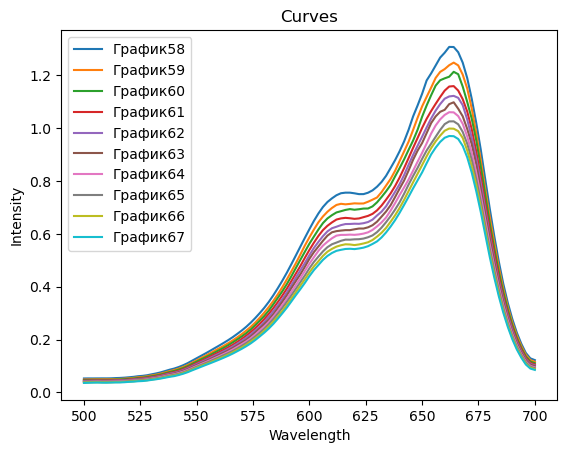

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from Excel file
data = pd.read_excel(r"C:\Users\ivan\WORK\Материа медика\output_folder\reaction_MC99_CSVR_1_C_CSVR_99_1.xlsx")

# Extract wavelength column
wavelength = data['wavelength']

# Extract other columns (assuming the column names are in Cyrillic, change if otherwise)
# Replace 'График15', 'График16', etc. with your actual column names
columns_to_plot = [col for col in data.columns if col.startswith('График')]

# Plot each curve
for column in columns_to_plot:
    plt.plot(wavelength, data[column], label=column)

# Add labels and legend
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Curves')
plt.legend()

# Show plot
plt.show()


In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Input folder containing .xlsx files
input_folder = "output_folder"

# Output folder for saving plots
output_folder = "output_folder_PDFs"
os.makedirs(output_folder, exist_ok=True)

# Iterate through each .xlsx file in the input folder
for file_name in os.listdir(input_folder):
    if file_name.endswith(".xlsx"):
        # Read data from Excel file
        file_path = os.path.join(input_folder, file_name)
        data = pd.read_excel(file_path)

        # Extract wavelength column
        wavelength = data['wavelength']

        # Extract base file name for plot title
        base_filename = os.path.splitext(file_name)[0]

        # Plot each curve
        for i, column in enumerate(data.columns[1:]):
            time_seconds = i * 30  # Time in seconds
            plt.plot(wavelength, data[column], label=f"{time_seconds} s")

        # Add labels and legend
        plt.xlabel('Wavelength $\lambda$, nm')
        plt.ylabel('Absorption Intensity')
        plt.grid()
        plt.title(base_filename)  # Title as base file name
        plt.legend()

        # Save plot as a .pdf file in the output folder
        output_file_path = os.path.join(output_folder, base_filename + '.pdf')
        plt.savefig(output_file_path)

        # Clear current plot for the next iteration
        plt.clf()

print("Plots saved successfully in the output folder.")


Plots saved successfully in the output folder.


<Figure size 640x480 with 0 Axes>

In [42]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Input folder containing .xlsx files
input_folder = "output_folder"

# Output folder for saving plots
output_folder = "output_folder_PDFs"
os.makedirs(output_folder, exist_ok=True)

# Iterate through each .xlsx file in the input folder
for file_name in os.listdir(input_folder):
    if file_name.endswith(".xlsx"):
        # Read data from Excel file
        file_path = os.path.join(input_folder, file_name)
        data = pd.read_excel(file_path)

        # Extract wavelength column
        wavelength = data['wavelength']

        # Extract base file name for plot title
        base_filename = os.path.splitext(file_name)[0]

        # Plot each curve
        for i, column in enumerate(data.columns[1:]):
            time_seconds = i * 30  # Time in seconds
            plt.plot(wavelength, data[column], label=f"{time_seconds} s")

            # Find maximum value and annotate it with "<"
            max_val_index = np.argmax(data[column])
            max_val_wavelength = data['wavelength'][max_val_index]
            max_val_intensity = data[column][max_val_index]
            plt.annotate('*', xy=(max_val_wavelength, max_val_intensity), xytext=(max_val_wavelength-0.04, max_val_intensity-0.03), color='red', fontsize=12)

        # Highlight range 650 to 675 nm
        plt.axvspan(650, 675, color='green', alpha=0.3)

        # Add labels and legend
        plt.xlabel('Wavelength $\lambda$, nm')
        plt.ylabel('Absorption Intensity')
        plt.title(base_filename)  # Title as base file name
        plt.legend()
        plt.grid()

        # Save plot as a .pdf file in the output folder
        output_file_path = os.path.join(output_folder, base_filename + '.pdf')
        plt.savefig(output_file_path)

        # Clear current plot for the next iteration
        plt.clf()

print("Plots saved successfully in the output folder.")


Plots saved successfully in the output folder.


<Figure size 640x480 with 0 Axes>

In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shutil

# Input folder containing .xlsx files and subfolders
input_folder = "output_folder++"

# Output folder for saving plots
output_folder = "output_folder_PDFs++"
os.makedirs(output_folder, exist_ok=True)

# Check if the output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through each .xlsx file in the input folder
for root, dirs, files in os.walk(input_folder):
    for file_name in files:
        if file_name.endswith(".xlsx"):
            # Determine subfolder structure
            relative_path = os.path.relpath(root, input_folder)
            output_subfolder = os.path.join(output_folder, relative_path)
            os.makedirs(output_subfolder, exist_ok=True)

            # Read data from Excel file
            file_path = os.path.join(root, file_name)
            data = pd.read_excel(file_path)

            # Extract wavelength column
            wavelength = data['wavelength']

            # Extract base file name for plot title
            base_filename = os.path.splitext(file_name)[0]

            # Plot each curve
            for i, column in enumerate(data.columns[1:]):
                time_seconds = i * 30  # Time in seconds
                plt.plot(wavelength, data[column], label=f"{time_seconds} s")

                # Find maximum value and annotate it with "*"
                max_val_index = np.argmax(data[column])
                max_val_wavelength = data['wavelength'][max_val_index]
                max_val_intensity = data[column][max_val_index]
                plt.annotate('*', xy=(max_val_wavelength, max_val_intensity), xytext=(max_val_wavelength-0.04, max_val_intensity-0.03), color='red', fontsize=12)

            # Highlight range 650 to 675 nm
            plt.axvspan(650, 675, color='green', alpha=0.3)

            # Add labels and legend
            plt.xlabel('Wavelength $\lambda$, nm')
            plt.ylabel('Absorption Intensity')
            plt.title(base_filename)  # Title as base file name
            plt.legend()
            plt.grid()

            # Save plot as a .pdf file in the output folder
            output_file_path = os.path.join(output_subfolder, base_filename + '.pdf')
            plt.savefig(output_file_path)

            # Clear current plot for the next iteration
            plt.clf()

print("Plots saved successfully in the output folder.")


Plots saved successfully in the output folder.


<Figure size 640x480 with 0 Axes>

In [45]:
import pandas as pd

data = pd.read_excel(r"C:\Users\ivan\WORK\Материа медика\output_folder\reaction_MC99_CSVR_1_C_CSVR_99_1.xlsx")


# Iterate over each column (excluding the first one which contains wavelengths)
for column in data.columns[1:]:
    max_value = data[column].max()  # Find the maximum value in the current column
    max_wavelength = data.loc[data[column] == max_value, "wavelength"].values[0]  # Find the corresponding wavelength
    print(f"Maximum value on {column}: {max_value} at wavelength {max_wavelength}")


Maximum value on График58: 1.307397 at wavelength 662
Maximum value on График59: 1.247999 at wavelength 664
Maximum value on График60: 1.213195 at wavelength 664
Maximum value on График61: 1.159136 at wavelength 664
Maximum value on График62: 1.122165 at wavelength 664
Maximum value on График63: 1.097889 at wavelength 664
Maximum value on График64: 1.060343 at wavelength 662
Maximum value on График65: 1.025781 at wavelength 664
Maximum value on График66: 0.998541 at wavelength 662
Maximum value on График67: 0.970277 at wavelength 662


In [47]:
import pandas as pd

# Read the data from the .xlsx file
data = pd.read_excel(r"C:\Users\ivan\WORK\Материа медика\output_folder\reaction_MC99_CSVR_1_C_CSVR_99_1.xlsx")

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=["time", "maximum_value"])

# Iterate over each column (excluding the first one which contains wavelengths)
for idx, column in enumerate(data.columns[1:], start=1):
    max_value = data[column].max()  # Find the maximum value in the current column
    time = (idx - 1) * 30  # Calculate time based on column index
    results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)

# Save the results to a new .xlsx file
output_file_path = file_path.replace('.xlsx', '_results.xlsx')
results.to_excel(output_file_path, index=False)
print(f"Results saved to {output_file_path}")


Results saved to output_folder++\Задача_этап 5_2\20-02-24\reaction_MC99_MCSVR1_C_MCSVR_99-1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\3709668108.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\3709668108.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\3709668108.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\3709668108.py:13: FutureWarning: The frame.append method is deprecated and will be remove

In [48]:
import os
import pandas as pd

# Function to process a single file
def process_file(file_path):
    # Read the data from the .xlsx file
    data = pd.read_excel(file_path)

    # Create an empty DataFrame to store the results
    results = pd.DataFrame(columns=["time", "maximum_value"])

    # Iterate over each column (excluding the first one which contains wavelengths)
    for idx, column in enumerate(data.columns[1:], start=1):
        max_value = data[column].max()  # Find the maximum value in the current column
        time = (idx - 1) * 30  # Calculate time based on column index
        results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)

    # Save the results to a new .xlsx file in the output folder
    output_file_path = os.path.join(output_folder, os.path.basename(file_path).replace('.xlsx', '_results.xlsx'))
    results.to_excel(output_file_path, index=False)
    print(f"Results saved to {output_file_path}")

# Input folder containing .xlsx files
input_folder = r"C:\Users\ivan\WORK\Материа медика\output_folder"

# Output folder for saving the results
output_folder = "output_folder__"
os.makedirs(output_folder, exist_ok=True)

# Process each .xlsx file in the input folder
for file_name in os.listdir(input_folder):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(input_folder, file_name)
        process_file(file_path)


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder__\reaction_MC99_CSVR_1_C_CSVR_99_1_results.xlsx
Results saved to output_folder__\reaction_MC99_CSVR_1_C_MCSVR_99_1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder__\reaction_MC99_H2OSVR_1_C_H2OSVR_99_1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder__\reaction_MC99_H2OSVR_1_C_H2O_99_1_results.xlsx
Results saved to output_folder__\reaction_MC99_H2O_1_C_CSVR_99_1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder__\reaction_MC99_H2O_1_C_H2OSVR_99_1_results.xlsx
Results saved to output_folder__\reaction_MC99_H2O_1_C_H2O_99_1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder__\reaction_MC99_MCSVR_1_C_CSVR_99_1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\2818998769.py:16: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder__\reaction_MC99_MCSVR_1_C_H2O_99_1_results.xlsx
Results saved to output_folder__\reaction_MC99_MCSVR_1_C_MCSVR_99_1_results.xlsx


In [50]:
import os
import pandas as pd
from shutil import copytree

# Function to process a single file
def process_file(file_path, output_folder):
    # Read the data from the .xlsx file
    data = pd.read_excel(file_path)

    # Create an empty DataFrame to store the results
    results = pd.DataFrame(columns=["time", "maximum_value"])

    # Iterate over each column (excluding the first one which contains wavelengths)
    for idx, column in enumerate(data.columns[1:], start=1):
        max_value = data[column].max()  # Find the maximum value in the current column
        time = (idx - 1) * 30  # Calculate time based on column index
        results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)

    # Create output subfolder if it doesn't exist
    subfolder = os.path.dirname(file_path)
    relative_subfolder = os.path.relpath(subfolder, input_folder)
    output_subfolder = os.path.join(output_folder, relative_subfolder)
    os.makedirs(output_subfolder, exist_ok=True)

    # Save the results to a new .xlsx file in the output subfolder
    output_file_path = os.path.join(output_subfolder, os.path.basename(file_path).replace('.xlsx', '_results.xlsx'))
    results.to_excel(output_file_path, index=False)
    print(f"Results saved to {output_file_path}")

# Input folder containing subfolders with .xlsx files
input_folder = r"C:\Users\ivan\WORK\Материа медика\output_folder++"

# Output folder for saving the results
output_folder = "output_folder_MAXs"
os.makedirs(output_folder, exist_ok=True)

# Process each .xlsx file in each subfolder of the input folder
for root, dirs, files in os.walk(input_folder):
    for file_name in files:
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(root, file_name)
            process_file(file_path, output_folder)

# Copy directory structure from input to output folder
copytree(input_folder, output_folder)


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\задача\MS_in_SVR_C_in_C_SVR_C\reaction1_MS_in_SVR_C_in_C_SVR_C_results.xlsx
Results saved to output_folder_MAXs\задача\MS_in_SVR_C_in_C_SVR_C\reaction2_MS_in_SVR_C_in_C_SVR_C_results.xlsx
Results saved to output_folder_MAXs\задача\MS_in_SVR_C_in_C_SVR_C\reaction3_MS_in_SVR_C_in_C_SVR_C_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\задача\MS_in_SVR_C_in_C_SVR_C\reaction4_MS_in_SVR_C_in_C_SVR_C_results.xlsx
Results saved to output_folder_MAXs\задача\MS_in_SVR_C_in_C_SVR_C\reaction5_MS_in_SVR_C_in_C_SVR_C_results.xlsx
Results saved to output_folder_MAXs\задача\MS_in_SVR_C_in_C_SVR_C\reaction6_MS_in_SVR_C_in_C_SVR_C_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\задача\MS_in_SVR_H2O_in_C_SVR_H2O\reaction1_MS_in_SVR_H2O_in_C_SVR_H2O_results.xlsx
Results saved to output_folder_MAXs\задача\MS_in_SVR_H2O_in_C_SVR_H2O\reaction2_MS_in_SVR_H2O_in_C_SVR_H2O_results.xlsx
Results saved to output_folder_MAXs\задача\MS_in_SVR_H2O_in_C_SVR_H2O\reaction3_MS_in_SVR_H2O_in_C_SVR_H2O_results.xlsx
Results saved to output_folder_MAXs\задача\MS_in_SVR_H2O_in_C_SVR_H2O\reaction4_MS_in_SVR_H2O_in_C_SVR_H2O_results.xlsx
Results saved to output_folder_MAXs\задача\MS_in_SVR_H2O_in_C_SVR_H2O\reaction5_MS_in_SVR_H2O_in_C_SVR_H2O_results.xlsx
Results saved to output_folder_MAXs\задача\MS_in_SVR_H2O_in_C_SVR_H2O\reaction6_MS_in_SVR_H2O_in_C_SVR_H2O_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\задача\MS_in_SVR_MS_in_C_SVR_MS\reaction1_MS_SVR_MS_in_C_SVR_MS_results.xlsx
Results saved to output_folder_MAXs\задача\MS_in_SVR_MS_in_C_SVR_MS\reaction2_MS_SVR_MS_in_C_SVR_MS_results.xlsx
Results saved to output_folder_MAXs\задача\MS_in_SVR_MS_in_C_SVR_MS\reaction3_MS_SVR_MS_in_C_SVR_MS_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\задача\MS_in_SVR_MS_in_C_SVR_MS\reaction4_MS_SVR_MS_in_C_SVR_MS_results.xlsx
Results saved to output_folder_MAXs\задача\MS_in_SVR_MS_in_C_SVR_MS\reaction5_MS_SVR_MS_in_C_SVR_MS_results.xlsx
Results saved to output_folder_MAXs\задача\MS_in_SVR_MS_in_C_SVR_MS\reaction6_MS_SVR_MS_in_C_SVR_MS_results.xlsx
Results saved to output_folder_MAXs\Задача 1_Юлчи_Бункин_продолжение\MC in SVR_C_C in SVR_C\reaction 1_30s  MC in SVR_C_C in SVR_C_23_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 1_Юлчи_Бункин_продолжение\MC in SVR_C_C in SVR_C\reaction 2_30s  MC in SVR_C_C in SVR_C_23_results.xlsx
Results saved to output_folder_MAXs\Задача 1_Юлчи_Бункин_продолжение\MC in SVR_C_C in SVR_C\reaction 3_30s  MC in SVR_C_C in SVR_C_23_results.xlsx
Results saved to output_folder_MAXs\Задача 1_Юлчи_Бункин_продолжение\MC in SVR_C_C in SVR_C\reaction 4_30s  MC in SVR_C_C in SVR_C_23_results.xlsx
Results saved to output_folder_MAXs\Задача 1_Юлчи_Бункин_продолжение\MC in SVR_C_C in SVR_C\reaction 5_30s  MC in SVR_C_C in SVR_C_23_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 1_Юлчи_Бункин_продолжение\MC in SVR_C_C in SVR_C\reaction 6_30s  MC in SVR_C_C in SVR_C_23_results.xlsx
Results saved to output_folder_MAXs\Задача 1_Юлчи_Бункин_продолжение\MC in SVR_MC_C_C in SVR_MC\reaction 1_30s  MC in SVR_MC_C_C in SVR_MC_23_results.xlsx
Results saved to output_folder_MAXs\Задача 1_Юлчи_Бункин_продолжение\MC in SVR_MC_C_C in SVR_MC\reaction 2_30s  MC in SVR_MC_C_C in SVR_MC_23_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 1_Юлчи_Бункин_продолжение\MC in SVR_MC_C_C in SVR_MC\reaction 3_30s  MC in SVR_MC_C_C in SVR_MC_23_results.xlsx
Results saved to output_folder_MAXs\Задача 1_Юлчи_Бункин_продолжение\MC in SVR_MC_C_C in SVR_MC\reaction 4_30s  MC in SVR_MC_C_C in SVR_MC_23_results.xlsx
Results saved to output_folder_MAXs\Задача 1_Юлчи_Бункин_продолжение\MC in SVR_MC_C_C in SVR_MC\reaction 5_30s  MC in SVR_MC_C_C in SVR_MC_26_results.xlsx
Results saved to output_folder_MAXs\Задача 1_Юлчи_Бункин_продолжение\MC in SVR_MC_C_C in SVR_MC\reaction 6_30s  MC in SVR_MC_C_C in SVR_MC_26_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\1-1\MC_in_H2O_1-1_ in C\reaction1_MC_in_H2O_1-1_ in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\1-1\MC_in_H2O_1-1_ in C\reaction_2_MC_in_H2O_1-1_ in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\1-1\MC_in_H2O_1-1_ in C\reaction_3_MC_in_H2O_1-1_ in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\1-1\MC_in_H2O_1-1_ in C\reaction_4_MC_in_H2O_1-1_ in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\1-1\MC_in_H2O_1-1_ in C\reaction_5_MC_in_H2O_1-1_ in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\1-1\MC_in_H2O_1-1_ in C\reaction_6_MC_in_H2O_1-1_ in C_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\1-1\MC_in_SVR_H2O_1-1_in C\reaction 1_MC_in_SVR_H2O_1-1_in_C_26_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\1-1\MC_in_SVR_H2O_1-1_in C\reaction 2_MC_in_SVR_H2O_1-1_in_C_26_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\1-1\MC_in_SVR_H2O_1-1_in C\reaction 3_MC_in_SVR_H2O_1-1_in_C_26_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\1-1\MC_in_SVR_H2O_1-1_in C\reaction 4_MC_in_SVR_H2O_1-1_in_C_26_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\1-1\MC_in_SVR_H2O_1-1_in C\reaction 5_MC_in_SVR_H2O_1-1_in_C_26_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\1-1\MC_in_SVR_H2O_1-1_in C\reaction 6_MC_in_SVR_H2O_1-1_in_C_26_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_H2O_9-1_in C\reaction 1_MC_in_H2O_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_H2O_9-1_in C\reaction 2_MC_in_H2O_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_H2O_9-1_in C\reaction 3_MC_in_H2O_in C_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_H2O_9-1_in C\reaction 4_MC_in_H2O_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_H2O_9-1_in C\reaction 5_MC_in_H2O_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_H2O_9-1_in C\reaction 6_MC_in_H2O_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_SVR_H2O_9-1_in C\reaction 1_MC_in_SVR_H2O_in_C_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_SVR_H2O_9-1_in C\reaction 2_MC_in_SVR_H2O_in_C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_SVR_H2O_9-1_in C\reaction 3_MC_in_SVR_H2O_in_C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_SVR_H2O_9-1_in C\reaction 4_MC_in_SVR_H2O_in_C_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_SVR_H2O_9-1_in C\reaction 5_MC_in_SVR_H2O_in_C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_SVR_H2O_9-1_in C\reaction 6_MC_in_SVR_H2O_in_C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_SVR_MC_9-1_in C\reaction 1_MC_in_SVR_MC_in C_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_SVR_MC_9-1_in C\reaction 2_MC_in_SVR_MC_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_SVR_MC_9-1_in C\reaction 3_MC_in_SVR_MC_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_SVR_MC_9-1_in C\reaction 4_MC_in_SVR_MC_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_SVR_MC_9-1_in C\reaction 5_MC_in_SVR_MC_in C_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\9-1\MC_in_SVR_MC_9-1_in C\reaction 6_MC_in_SVR_MC_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_H2O_99-1_in C\reaction 1_MC_in_H2O_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_H2O_99-1_in C\reaction 2_MC_in_H2O_in C_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_H2O_99-1_in C\reaction 3_MC_in_H2O_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_H2O_99-1_in C\reaction 4_MC_in_H2O_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_H2O_99-1_in C\reaction 5_MC_in_H2O_in C_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_H2O_99-1_in C\reaction 6_MC_in_H2O_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_SVR_H2O_99-1_in C\reaction 1_MC_in_SVR_H2O_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_SVR_H2O_99-1_in C\reaction 2_MC_in_SVR_H2O_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_SVR_H2O_99-1_in C\reaction 3_MC_in_SVR_H2O_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_SVR_H2O_99-1_in C\reaction 4_MC_in_SVR_H2O_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_SVR_H2O_99-1_in C\reaction 5_MC_in_SVR_H2O_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_SVR_H2O_99-1_in C\reaction 6_MC_in_SVR_H2O_in C_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_SVR_MC_99-1_in C\reaction 1_MC_inSVR_MC_99-1_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_SVR_MC_99-1_in C\reaction 2_MC_inSVR_MC_99-1_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_SVR_MC_99-1_in C\reaction 3_MC_inSVR_MC_99-1_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_SVR_MC_99-1_in C\reaction 4_MC_inSVR_MC_99-1_in C_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_SVR_MC_99-1_in C\reaction 5_MC_inSVR_MC_99-1_in C_results.xlsx
Results saved to output_folder_MAXs\Задача 2.1_Юлчи_Минь_продолжение\99-1\MC_in_SVR_MC_99-1_in C\reaction 6_MC_inSVR_MC_99-1_in C_results.xlsx
Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_H2O\reaction_1_MC_in_C_H2O_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_H2O\reaction_2_MC_in_C_H2O_results.xlsx
Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_H2O\reaction_3_MC_in_C_H2O_results.xlsx
Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_H2O\reaction_4_MC_in_C_H2O_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_H2O\reaction_5_MC_in_C_H2O_results.xlsx
Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_H2O\reaction_6_MC_in_C_H2O_results.xlsx
Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_SVR_C\reaction1_MC_in_C_in_SVR_C_results.xlsx
Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_SVR_C\reaction2_MC_in_C_in_SVR_C_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_SVR_C\reaction3_MC_in_C_in_SVR_C_results.xlsx
Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_SVR_C\reaction4_MC_in_C_in_SVR_C_results.xlsx
Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_SVR_C\reaction5_MC_in_C_in_SVR_C_results.xlsx
Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_SVR_C\reaction6_MC_in_C_in_SVR_C_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_SVR_H2O\reaction_1_MC_in_C_SVR_H2O_results.xlsx
Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_SVR_H2O\reaction_2_MC_in_C_SVR_H2O_results.xlsx
Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_SVR_H2O\reaction_3_MC_in_C_SVR_H2O_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_SVR_H2O\reaction_4_MC_in_C_SVR_H2O_results.xlsx
Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_SVR_H2O\reaction_5_MC_in_C_SVR_H2O_results.xlsx
Results saved to output_folder_MAXs\задача 2.2\C_1-1\MC_in_C_SVR_H2O\reaction_6_MC_in_C_SVR_H2O_results.xlsx
Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\1-1\reaction1_MB_SVR_MB_in_C_SVR_C_1-1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\1-1\reaction2_MB_SVR_MB_in_C_SVR_C_1-1_results.xlsx
Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\1-1\reaction3_MB_SVR_MB_in_C_SVR_C_1-1_results.xlsx
Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\1-1\reaction4_MB_SVR_MB_in_C_SVR_C_1-1_results.xlsx
Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\1-1\reaction5_MB_SVR_MB_in_C_SVR_C_1-1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\1-1\reaction6_MB_SVR_MB_in_C_SVR_C_1-1_results.xlsx
Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\9-1\reaction1_MB_SVR_MB_in_C_SVR_C_9-1_results.xlsx
Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\9-1\reaction2_MB_SVR_MB_in_C_SVR_C_9-1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\9-1\reaction3_MB_SVR_MB_in_C_SVR_C_9-1_results.xlsx
Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\9-1\reaction4_MB_SVR_MB_in_C_SVR_C_9-1_results.xlsx
Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\9-1\reaction5_MB_SVR_MB_in_C_SVR_C_9-1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\9-1\reaction6_MB_SVR_MB_in_C_SVR_C_9-1_results.xlsx
Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\99-1\reaction1_MB_SVR_MB_in_C_SVR_C_99-1_results.xlsx
Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\99-1\reaction2_MB_SVR_MB_in_C_SVR_C_99-1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\99-1\reaction3_MB_SVR_MB_in_C_SVR_C_99-1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\99-1\reaction4_MB_SVR_MB_in_C_SVR_C_99-1_results.xlsx
Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\99-1\reaction5_MB_SVR_MB_in_C_SVR_C_99-1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача 2.3\MB_in_SVR_MB_in_C_in_SVR_C\99-1\reaction6_MB_SVR_MB_in_C_SVR_C_99-1_results.xlsx
Results saved to output_folder_MAXs\Задача1\18-07-23\reaction_MB_H2O_ACK_H2O_22.9_results.xlsx
Results saved to output_folder_MAXs\Задача1\18-07-23\reaction_MB_H2O_ACK_SVR_ACK_22.4_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача1\18-07-23\reaction_MB_H2O_ACK_SVR_H2O_22.7_results.xlsx
Results saved to output_folder_MAXs\Задача1\18-07-23\reaction_MB_H2O_ACK_SVR_MB_22.4_results.xlsx
Results saved to output_folder_MAXs\Задача1\18-07-23\reaction_MB_SVR_ACK_ACK_SVR_MB_22.5_results.xlsx
Results saved to output_folder_MAXs\Задача1\18-07-23\reaction_MB_SVR_H2O_ACK_H2O_22.5_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача1\18-07-23\reaction_MB_SVR_H2O_ACK_SVR_ACK_23.0_results.xlsx
Results saved to output_folder_MAXs\Задача1\18-07-23\reaction_MB_SVR_H2O_ACK_SVR_H2O_22.7_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача1\18-07-23\reaction_MB_SVR_MB_ACK_SVR_ACK_22.2_results.xlsx
Results saved to output_folder_MAXs\Задача1\19-07-23\reaction_MB_SVR_ACK_ACK_H2O_22.6_results.xlsx
Results saved to output_folder_MAXs\Задача1\19-07-23\reaction_MB_SVR_ACK_ACK_SVR_ACK_23.1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача1\19-07-23\reaction_MB_SVR_ACK_ACK_SVR_H2O_22.8_results.xlsx
Results saved to output_folder_MAXs\Задача1\19-07-23\reaction_MB_SVR_H2O_ACK_H2O_22.2_results.xlsx
Results saved to output_folder_MAXs\Задача1\19-07-23\reaction_MB_SVR_H2O_ACK_SVR_ACK_22.5_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача1\19-07-23\reaction_MB_SVR_H2O_ACK_SVR_MB_22.5_results.xlsx
Results saved to output_folder_MAXs\Задача1\19-07-23\reaction_MB_SVR_MB_ACK_H2O_22.5_results.xlsx
Results saved to output_folder_MAXs\Задача1\19-07-23\reaction_MB_SVR_MB_ACK_SVR_H2O_22.5_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача1\19-07-23\reaction_MB_SVR_MB_ACK_SVR_MB_22.5_results.xlsx
Results saved to output_folder_MAXs\Задача1\20-07-23\reaction1_MB_H2O_ACK_H2O_22.3_results.xlsx
Results saved to output_folder_MAXs\Задача1\20-07-23\reaction2_MB_H2O_ACK_H2O_22.4_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача1\20-07-23\reaction3_MB_H2O_ACK_H2O_22.4_results.xlsx
Results saved to output_folder_MAXs\Задача1\20-07-23\reaction4_MB_H2O_ACK_H2O_22.6_results.xlsx
Results saved to output_folder_MAXs\Задача1\20-07-23\reaction5_MB_H2O_ACK_H2O_23.0_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача1\20-07-23\reaction6_MB_H2O_ACK_H2O_23.5_results.xlsx
Results saved to output_folder_MAXs\Задача1\21-07-23\reaction_MB_SVR_ACK_ACK_SVR_MB\reaction1_MB_SVR_ACK_ACK_SVR_MB_24.6_results.xlsx
Results saved to output_folder_MAXs\Задача1\21-07-23\reaction_MB_SVR_ACK_ACK_SVR_MB\reaction2_MB_SVR_ACK_ACK_SVR_MB_24.4_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача1\21-07-23\reaction_MB_SVR_ACK_ACK_SVR_MB\reaction3_MB_SVR_ACK_ACK_SVR_MB_24.4_results.xlsx
Results saved to output_folder_MAXs\Задача1\21-07-23\reaction_MB_SVR_ACK_ACK_SVR_MB\reaction4_MB_SVR_ACK_ACK_SVR_MB_24.6_results.xlsx
Results saved to output_folder_MAXs\Задача1\21-07-23\reaction_MB_SVR_ACK_ACK_SVR_MB\reaction5_MB_SVR_ACK_ACK_SVR_MB_25.3_results.xlsx
Results saved to output_folder_MAXs\Задача1\21-07-23\reaction_MB_SVR_ACK_ACK_SVR_MB\reaction6_MB_SVR_ACK_ACK_SVR_MB_25.4_results.xlsx
Results saved to output_folder_MAXs\Задача1\21-07-23\reaction_MB_SVR_ACK_ACK_SVR_MB\Кислород\reaction1_continue_MB_SVR_ACK_ACK_SVR_MB_24.6_results.xlsx
Results saved to output_folder_MAXs\Задача1\21-07-23\reaction_MB_SVR_ACK_ACK_SVR_MB\Кислород\reaction3_continue_MB_SVR_ACK_ACK_SVR_MB_24.5_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача1\21-07-23\reaction_MB_SVR_ACK_ACK_SVR_MB\Кислород\reaction4_not_oxygen_MB_SVR_ACK_ACK_SVR_MB_24.6_results.xlsx
Results saved to output_folder_MAXs\Задача1\21-07-23\reaction_MB_SVR_ACK_ACK_SVR_MB\Кислород\reaction5_start_oxygen_MB_SVR_ACK_ACK_SVR_MB_25.0_results.xlsx
Results saved to output_folder_MAXs\Задача1\21-07-23\reaction_MB_SVR_MB_ACK_SVR_ACK\reaction1_MB_SVR_MB_ACK_SVR_ACK_22.5_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача1\21-07-23\reaction_MB_SVR_MB_ACK_SVR_ACK\reaction2_MB_SVR_MB_ACK_SVR_ACK_23.0_results.xlsx
Results saved to output_folder_MAXs\Задача1\21-07-23\reaction_MB_SVR_MB_ACK_SVR_ACK\reaction3_MB_SVR_MB_ACK_SVR_ACK_24.0_results.xlsx
Results saved to output_folder_MAXs\Задача1\21-07-23\reaction_MB_SVR_MB_ACK_SVR_ACK\reaction4_MB_SVR_MB_ACK_SVR_ACK_24.2_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача1\21-07-23\reaction_MB_SVR_MB_ACK_SVR_ACK\reaction5_MB_SVR_MB_ACK_SVR_ACK_23.8_results.xlsx
Results saved to output_folder_MAXs\Задача1\21-07-23\reaction_MB_SVR_MB_ACK_SVR_ACK\reaction6_MB_SVR_MB_ACK_SVR_ACK_24.2_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача1\21-07-23\Проверка влияния солн. света на MB_SVR_MB + ACK_SVR_ACK\reaction_MB_SVR_MB_ACK_SVR_ACK_after-sun_24.4_results.xlsx
Results saved to output_folder_MAXs\Задача1\21-07-23\Проверка влияния солн. света на MB_SVR_MB + ACK_SVR_ACK\reaction_MB_SVR_MB_ACK_SVR_ACK_before-sun_24.0_results.xlsx
Results saved to output_folder_MAXs\Задача1\21-07-23\Проверка через светодиодную лампу\reaction_MB_SVR_MB_ACK_SVR_ACK_after_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача1\25-07-23\MB_SVR_H2O_ACK_SVR_H2O\reaction1_MB_SVR_H2O_ACK_SVR_H2O_22.6_results.xlsx
Results saved to output_folder_MAXs\Задача1\25-07-23\MB_SVR_H2O_ACK_SVR_H2O\reaction2_MB_SVR_H2O_ACK_SVR_H2O_22.7_results.xlsx
Results saved to output_folder_MAXs\Задача1\25-07-23\MB_SVR_H2O_ACK_SVR_H2O\reaction3_MB_SVR_H2O_ACK_SVR_H2O_22.8_results.xlsx
Results saved to output_folder_MAXs\Задача1\25-07-23\MB_SVR_H2O_ACK_SVR_H2O\reaction4_MB_SVR_H2O_ACK_SVR_H2O_22.4_results.xlsx
Results saved to output_folder_MAXs\Задача1\25-07-23\MB_SVR_H2O_ACK_SVR_H2O\reaction5_MB_SVR_H2O_ACK_SVR_H2O_22.2_results.xlsx
Results saved to output_folder_MAXs\Задача1\25-07-23\MB_SVR_H2O_ACK_SVR_H2O\reaction6_MB_SVR_H2O_ACK_SVR_H2O_22.5_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача1\25-07-23\MB_SVR_H2O_ACK_SVR_H2O\reaction7_MB_SVR_H2O_ACK_SVR_H2O_22.7_results.xlsx
Results saved to output_folder_MAXs\Задача1\Пробные тесты жидкостей\reaction MC0.034g_l__C_10g_l_MQ_step30s_22.5C_results.xlsx
Results saved to output_folder_MAXs\Задача1\Пробные тесты жидкостей\reaction MC0.06g_l__C_10g_l_MQ_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача2\01-08-23\reaction_MB_H2O_1-1_ACK_22.2_results.xlsx
Results saved to output_folder_MAXs\Задача2\01-08-23\reaction_MB_SVR_H2O_1-1_ACK_22.5_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача2\01-08-23\reaction_MB_SVR_MB_1-1_ACK_22.8_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\13-02-24\reaction_MC99_CSVR_1_C_CSVR_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\13-02-24\reaction_MC99_CSVR_1_C_MCSVR_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\13-02-24\reaction_MC99_H2OSVR_1_C_H2OSVR_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\13-02-24\reaction_MC99_H2OSVR_1_C_H2O_99_1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\13-02-24\reaction_MC99_H2O_1_C_CSVR_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\13-02-24\reaction_MC99_H2O_1_C_H2OSVR_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\13-02-24\reaction_MC99_H2O_1_C_H2O_99_1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\13-02-24\reaction_MC99_MCSVR_1_C_CSVR_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\13-02-24\reaction_MC99_MCSVR_1_C_H2O_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\13-02-24\reaction_MC99_MCSVR_1_C_MCSVR_99_1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\14-02-24\reaction_MC99_CSVR_1_C_CSVR_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\14-02-24\reaction_MC99_CSVR_1_C_MCSVR_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\14-02-24\reaction_MC99_H2OSVR_1_C_H2OSVR_99_1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\14-02-24\reaction_MC99_H2OSVR_1_C_H2O_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\14-02-24\reaction_MC99_H2O_1_C_CSVR_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\14-02-24\reaction_MC99_H2O_1_C_H2OSVR_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\14-02-24\reaction_MC99_H2O_1_C_H2O_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\14-02-24\reaction_MC99_MCSVR_1_C_CSVR_99_1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\14-02-24\reaction_MC99_MCSVR_1_C_H2O_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\14-02-24\reaction_MC99_MCSVR_1_C_MCSVR_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\15-02-24\reaction_MC99_CSVR_1_C_CSVR_99_1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\15-02-24\reaction_MC99_CSVR_1_C_MCSVR_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\15-02-24\reaction_MC99_H2OSVR_1_C_H2OSVR_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\15-02-24\reaction_MC99_H2OSVR_1_C_H2O_99_1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\15-02-24\reaction_MC99_H2O_1_C_CSVR_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\15-02-24\reaction_MC99_H2O_1_C_H2OSVR_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\15-02-24\reaction_MC99_H2O_1_C_H2O_99_1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\15-02-24\reaction_MC99_MCSVR_1_C_CSVR_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\15-02-24\reaction_MC99_MCSVR_1_C_H2O_99_1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\15-02-24\reaction_MC99_MCSVR_1_C_MCSVR_99_1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\16-02-24\reaction_MC99_CSVR1_C_CSVR_99-1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\16-02-24\reaction_MC99_CSVR1_C_MCSVR_99-1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\16-02-24\reaction_MC99_H2O1_C_CSVR_99-1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\16-02-24\reaction_MC99_H2O1_C_H2OSVR_99-1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\16-02-24\reaction_MC99_H2O1_C_H2O_99-1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\16-02-24\reaction_MC99_H2OSVR1_C_H2OSVR_99-1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\16-02-24\reaction_MC99_H2OSVR1_C_H2O_99-1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\16-02-24\reaction_MC99_MCSVR1_C_CSVR_99-1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\16-02-24\reaction_MC99_MCSVR1_C_H2O_99-1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\16-02-24\reaction_MC99_MCSVR1_C_MCSVR_99-1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\20-02-24\reaction_MC99_CSVR1_C_CSVR_99-1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\20-02-24\reaction_MC99_CSVR1_C_MCSVR_99-1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\20-02-24\reaction_MC99_H2O1_C_CSVR_99-1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\20-02-24\reaction_MC99_H2O1_C_H2OSVR_99-1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\20-02-24\reaction_MC99_H2O1_C_H2O_99-1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\20-02-24\reaction_MC99_H2OSVR1_C_H2OSVR_99-1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\20-02-24\reaction_MC99_H2OSVR1_C_H2O_99-1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\20-02-24\reaction_MC99_MCSVR1_C_CSVR_99-1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\20-02-24\reaction_MC99_MCSVR1_C_H2O_99-1_results.xlsx
Results saved to output_folder_MAXs\Задача_этап 5_2\20-02-24\reaction_MC99_MCSVR1_C_MCSVR_99-1_results.xlsx


C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"time": time, "maximum_value": max_value}, ignore_index=True)
C:\Users\ivan\AppData\Local\Temp\ipykernel_428\4219023100.py:17: FutureWarning: The frame.append method is deprecated and will be remove

Results saved to output_folder_MAXs\Задача_этап 5_2\20-02-24\reaction_MC99_MCSVR1_C_MCSVR_99-1_results_results.xlsx


FileExistsError: [WinError 183] Невозможно создать файл, так как он уже существует: 'output_folder_MAXs'

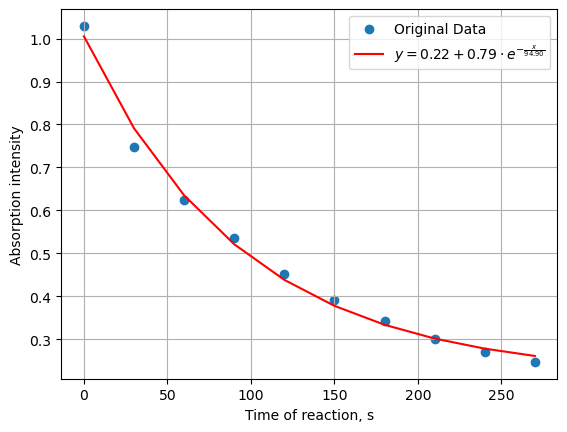

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

# Read data from Excel file
df = pd.read_excel(r'C:\Users\ivan\WORK\Материа медика\output_folder_MAXs\Задача_этап 5_2\20-02-24\reaction_MC99_CSVR1_C_CSVR_99-1_results.xlsx')

# Extracting time and maximum value columns
time = df['time'].values
maximum_value = df['maximum_value'].values

# Exponential model function
def exponential_function(x, A, B, C):
    return A + B * np.exp(-x / C)

# Create a model instance
model = Model(exponential_function)

# Set initial parameter values and bounds
params = model.make_params(A=1, B=1, C=100)

# Perform fitting
result = model.fit(maximum_value, x=time, params=params)

# Get optimized parameters
A, B, C = result.best_values['A'], result.best_values['B'], result.best_values['C']

# LaTeX-styled equation with embedded coefficients for the legend
equation = f'$y = {A:.2f} + {B:.2f} \cdot e^{{-\\frac{{x}}{{{C:.2f}}}}}$'

# Plotting
plt.scatter(time, maximum_value, label='Original Data')
plt.plot(time, result.best_fit, 'r-', label=equation)
plt.xlabel('Time of reaction, s')
plt.ylabel('Absorption intensity')
#plt.title('Exponential Approximation of Data using lmfit')
plt.legend()
plt.grid(True)
plt.show()


In [62]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

# Exponential model function
def exponential_function(x, A, B, C):
    return A + B * np.exp(-x / C)

# Function to process each Excel file
def process_excel_file(file_path, output_dir):
    # Read data from Excel file
    df = pd.read_excel(file_path)

    # Extracting time and maximum value columns
    time = df['time'].values
    maximum_value = df['maximum_value'].values

    # Create a model instance
    model = Model(exponential_function)

    # Set initial parameter values and bounds
    params = model.make_params(A=1, B=1, C=100)

    # Perform fitting
    result = model.fit(maximum_value, x=time, params=params)

    # Get optimized parameters
    A, B, C = result.best_values['A'], result.best_values['B'], result.best_values['C']

    # LaTeX-styled equation with embedded coefficients for the legend
    equation = f'$y = {A:.2f} + {B:.2f} \cdot e^{{-\\frac{{x}}{{{C:.2f}}}}}$'

    # Plotting
    plt.figure()
    plt.scatter(time, maximum_value, label='Original Data')
    plt.plot(time, result.best_fit, 'r-', label=equation)
    plt.xlabel('Time of reaction, s')
    plt.ylabel('Absorption intensity')
    plt.legend()
    plt.grid(True)
    
    # Save plot as PDF
    output_file = os.path.join(output_dir, os.path.basename(file_path).replace('.xlsx', '.pdf'))
    plt.savefig(output_file)
    plt.close()

# Function to process a directory and its subdirectories
def process_directory(input_dir, output_dir):
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Traverse the directory structure
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.xlsx'):
                file_path = os.path.join(root, file)
                process_excel_file(file_path, output_dir)

# Define input and output directories
input_dir = r'output_folder_MAXs'
output_dir = r'output_folder_EXPs'

# Process the directory
process_directory(input_dir, output_dir)


Exception ignored in: <function ZipFile.__del__ at 0x0000024F801CFE20>
Traceback (most recent call last):
  File "C:\Users\ivan\anaconda3\Lib\zipfile.py", line 1874, in __del__
    self.close()
  File "C:\Users\ivan\anaconda3\Lib\zipfile.py", line 1891, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


TypeError: Improper input: func input vector length N=3 must not exceed func output vector length M=1

In [67]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

def process_excel_file(file_path, output_dir):
    # Read data from Excel file
    df = pd.read_excel(file_path)

    # Extracting time and maximum value columns
    time = df['time'].values
    maximum_value = df['maximum_value'].values

    # Exponential model function
    def exponential_function(x, A, B, C):
        return A + B * np.exp(-x / C)

    # Create a model instance
    model = Model(exponential_function)

    # Set initial parameter values and bounds
    params = model.make_params(A=1, B=1, C=100)

    # Perform fitting
    result = model.fit(maximum_value, x=time, params=params)

    # Get optimized parameters
    A, B, C = result.best_values['A'], result.best_values['B'], result.best_values['C']

    # LaTeX-styled equation with embedded coefficients for the legend
    equation = f'$y = {A:.2f} + {B:.2f} \cdot e^{{-\\frac{{x}}{{{C:.2f}}}}}$'

    # Save results to a new folder
    output_subfolder = os.path.join(output_dir, os.path.relpath(os.path.dirname(file_path), input_dir))
    os.makedirs(output_subfolder, exist_ok=True)
    output_path = os.path.join(output_subfolder, os.path.basename(file_path))

    # Save results to a new Excel file
    df['fitted_values'] = result.best_fit
    df.to_excel(output_path, index=False)

    # Plotting
    plt.scatter(time, maximum_value, label='Original Data')
    plt.plot(time, result.best_fit, 'r-', label=equation)
    plt.xlabel('Time of reaction, s')
    plt.ylabel('Absorption intensity')
    plt.legend()
    plt.grid(True)
    plt.savefig(output_path.replace('.xlsx', '.pdf'))  # Save plot as PDF
    plt.close()

def process_directory(input_dir, output_dir):
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Process each file in the input directory
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.xlsx'):
                file_path = os.path.join(root, file)
                process_excel_file(file_path, output_dir)

# Set input and output directories
input_dir = r'output_folder_MAXs'
output_dir = r'output_folder_EXPs_'

# Process the directory
process_directory(input_dir, output_dir)


In [68]:
import os
import pandas as pd
import numpy as np
from lmfit import Model

def process_excel_file(file_path, coefficients_list):
    try:
        # Read data from Excel file
        df = pd.read_excel(file_path)

        # Extracting time and maximum value columns
        time = df['time'].values
        maximum_value = df['maximum_value'].values

        # Exponential model function
        def exponential_function(x, A, B, C):
            return A + B * np.exp(-x / C)

        # Create a model instance
        model = Model(exponential_function)

        # Set initial parameter values and bounds
        params = model.make_params(A=1, B=1, C=100)

        # Perform fitting
        result = model.fit(maximum_value, x=time, params=params)

        # Get optimized parameters
        A, B, C = result.best_values['A'], result.best_values['B'], result.best_values['C']

        # Append coefficients to the list
        coefficients_list.append({'Filename': os.path.basename(file_path), 'A': A, 'B': B, 'C': C})

    except Exception as e:
        print(f"Error processing file '{file_path}': {e}")

def process_directory(input_dir, output_dir):
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Initialize coefficients list
    coefficients_list = []

    # Process each file in the input directory
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.xlsx'):
                file_path = os.path.join(root, file)
                process_excel_file(file_path, coefficients_list)

    # Convert coefficients list to DataFrame
    coefficients_df = pd.DataFrame(coefficients_list)

    # Save DataFrame to CSV
    coefficients_output_path = os.path.join(output_dir, 'coefficients.csv')
    coefficients_df.to_csv(coefficients_output_path, index=False)


# Set input and output directories
input_dir = r'output_folder_MAXs'
output_dir = r'output_folder_EXPs-'

# Process the directory
process_directory(input_dir, output_dir)


In [5]:
import os
import pandas as pd
import numpy as np
from lmfit import Model

def process_excel_file(file_path, coefficients_list):
    try:
        # Read data from Excel file
        df = pd.read_excel(file_path)

        # Extracting time and maximum value columns
        time = df['time'].values
        maximum_value = df['maximum_value'].values

        # Exponential model function
        def exponential_function(x, A, B, C):
            return A + B * np.exp(-x / C)

        # Create a model instance
        model = Model(exponential_function)

        # Set initial parameter values and bounds
        params = model.make_params(A=1, B=1, C=100)

        # Perform fitting
        result = model.fit(maximum_value, x=time, params=params)

        # Get optimized parameters
        A, B, C = result.best_values['A'], result.best_values['B'], result.best_values['C']

        # Append coefficients to the list
        folder_name = os.path.basename(os.path.dirname(file_path))
        coefficients_list.append({'Filename': os.path.basename(file_path), 'Folder': folder_name, 'A': A, 'B': B, 'C': C})

    except Exception as e:
        print(f"Error processing file '{file_path}': {e}")

def process_directory(input_dir, output_dir):
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Initialize coefficients list
    coefficients_list = []

    # Process each file in the input directory
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.xlsx'):
                file_path = os.path.join(root, file)
                process_excel_file(file_path, coefficients_list)

    # Convert coefficients list to DataFrame
    coefficients_df = pd.DataFrame(coefficients_list)

    # Save DataFrame to CSV
    coefficients_output_path = os.path.join(output_dir, 'coefficients_.csv')
    coefficients_df.to_csv(coefficients_output_path, index=False)


# Set input and output directories
input_dir = r'output_folder_MAXs'
output_dir = r'output_folder_EXPs-'

# Process the directory
process_directory(input_dir, output_dir)


## Determining dataset structure

In [14]:
import pandas as pd
coefs = pd.read_csv('coefficients_.csv')

In [15]:
coefs

Filename                  Folder  \
0       reaction1_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
1       reaction2_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
2       reaction3_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
3       reaction4_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
4       reaction5_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
..                                                ...                     ...   
214  reaction_MC99_H2OSVR1_C_H2OSVR_99-1_results.xlsx                20-02-24   
215     reaction_MC99_H2OSVR1_C_H2O_99-1_results.xlsx                20-02-24   
216     reaction_MC99_MCSVR1_C_CSVR_99-1_results.xlsx                20-02-24   
217      reaction_MC99_MCSVR1_C_H2O_99-1_results.xlsx                20-02-24   
218    reaction_MC99_MCSVR1_C_MCSVR_99-1_results.xlsx                20-02-24   

            A         B           C  
0    0.691235  0.342100  115.984650  
1    0.395779  0.556940  241.474368  
2    0.809577  0.375694  207.206930  
3    0.605503  0.587925  284.397973  
4    0.668891  0.527788  241.835646  
..        ...       ...         ...  
214  0.131133  0.963228  185.392464  
215  0.206780  0.881852  146.554475  
216  0.243424  0.835129  139.745755  
217  0.164273  0.914477  143.939141  
218  0.161211  1.003095  210.900295  

[219 rows x 5 columns]

In [3]:
coefs['Filename']

0         reaction1_MS_in_SVR_C_in_C_SVR_C_results.xlsx
1         reaction2_MS_in_SVR_C_in_C_SVR_C_results.xlsx
2         reaction3_MS_in_SVR_C_in_C_SVR_C_results.xlsx
3         reaction4_MS_in_SVR_C_in_C_SVR_C_results.xlsx
4         reaction5_MS_in_SVR_C_in_C_SVR_C_results.xlsx
                             ...                       
214    reaction_MC99_H2OSVR1_C_H2OSVR_99-1_results.xlsx
215       reaction_MC99_H2OSVR1_C_H2O_99-1_results.xlsx
216       reaction_MC99_MCSVR1_C_CSVR_99-1_results.xlsx
217        reaction_MC99_MCSVR1_C_H2O_99-1_results.xlsx
218      reaction_MC99_MCSVR1_C_MCSVR_99-1_results.xlsx
Name: Filename, Length: 219, dtype: object

In [4]:
coefs[coefs['Filename'] == 'reaction_MC99_H2OSVR1_C_H2OSVR_99-1_results.xlsx']

Filename         A         B  \
204  reaction_MC99_H2OSVR1_C_H2OSVR_99-1_results.xlsx  0.320373  0.896386   
214  reaction_MC99_H2OSVR1_C_H2OSVR_99-1_results.xlsx  0.131133  0.963228   

              C  
204  213.728808  
214  185.392464

In [24]:
def update_MB_column(filename):
    if 'MC99' in filename:
        return 99
    elif 'MC' in filename or 'MB' in filename or 'MS' in filename and 'MS_in_SVR' not in filename:
        return 1
    else:
        return 0

# Apply the function to update the 'MB' column
coefs['MB'] = coefs['Filename'].apply(lambda x: update_MB_column(x))

In [32]:
def update_H2OSVR_column(filename):
    if 'H2OSVR1' in filename or 'H2OSVR' in filename and 'H2OSVR_99' not in filename:
        return 1
    elif 'H2OSVR_99' in filename:
        return 99
    else:
        return 0

# Apply the function to update the 'H2OSVR' column
coefs['H2O_SDS'] = coefs['Filename'].apply(lambda x: update_H2OSVR_column(x))


In [22]:
def update_MBSVR_column(filename):
    if 'MCSVR1' in filename or 'MCSVR' in filename or 'MS_in_SVR' in filename:
        return 1
    else:
        return 0

# Apply the function to update the 'MCSVR1' column
coefs['MB_SDS'] = coefs['Filename'].apply(lambda x: update_MBSVR_column(x))

In [26]:
# Function to determine the value of 'CSVR' column based on 'Filename'
def update_CSVR_column(filename):
    if 'CSVR' in filename or 'SVR_C' in filename:
        return 1
    else:
        return 0

# Apply the function to update the 'CSVR' column
coefs['AA_SDS'] = coefs['Filename'].apply(lambda x: update_CSVR_column(x))

In [28]:
# Function to determine the value of 'C' column based on 'Filename'
def update_C_column(filename):
    if '_C_' in filename:
        return 1
    else:
        return 0

# Apply the function to update the 'C' column
coefs['AA'] = coefs['Filename'].apply(lambda x: update_C_column(x))

In [30]:
# Function to determine the value of 'H2O' column based on 'Filename'
def update_H2O_column(filename):
    if '_H2O_' in filename:
        return 1
    else:
        return 0

# Apply the function to update the 'H2O' column
coefs['H2O'] = coefs['Filename'].apply(lambda x: update_H2O_column(x))

In [35]:
coefs = pd.read_excel('result.xlsx')

In [36]:
coefs

Filename                  Folder  \
0       reaction1_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
1       reaction2_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
2       reaction3_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
3       reaction4_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
4       reaction5_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
..                                                ...                     ...   
214  reaction_MC99_H2OSVR1_C_H2OSVR_99-1_results.xlsx                20-02-24   
215     reaction_MC99_H2OSVR1_C_H2O_99-1_results.xlsx                20-02-24   
216     reaction_MC99_MCSVR1_C_CSVR_99-1_results.xlsx                20-02-24   
217      reaction_MC99_MCSVR1_C_H2O_99-1_results.xlsx                20-02-24   
218    reaction_MC99_MCSVR1_C_MCSVR_99-1_results.xlsx                20-02-24   

            A         B           C  H2O_SDS  MB_SDS  MB  AA_SDS  AA  H2O  \
0    0.691235  0.342100  115.984650        0       1   0       1   1    0   
1    0.395779  0.556940  241.474368        0       1   0       1   1    0   
2    0.809577  0.375694  207.206930        0       1   0       1   1    0   
3    0.605503  0.587925  284.397973        0       1   0       1   1    0   
4    0.668891  0.527788  241.835646        0       1   0       1   1    0   
..        ...       ...         ...      ...     ...  ..     ...  ..  ...   
214  0.131133  0.963228  185.392464        1       0  99       0  99    0   
215  0.206780  0.881852  146.554475        1       0  99       0  99    1   
216  0.243424  0.835129  139.745755        0       1  99       1  99    0   
217  0.164273  0.914477  143.939141        0       1  99       1  99    1   
218  0.161211  1.003095  210.900295        0       1  99       1  99    0   

     MB+  AA+  MB_SDS+  AA_SDS+  H2O+  H20_SDS+  Oxygen  Sun  
0    NaN  NaN      NaN      NaN   NaN       NaN     NaN  NaN  
1    NaN  NaN      NaN      NaN   NaN       NaN     NaN  NaN  
2    NaN  NaN      NaN      NaN   NaN       NaN     NaN  NaN  
3    NaN  NaN      NaN      NaN   NaN       NaN     NaN  NaN  
4    NaN  NaN      NaN      NaN   NaN       NaN     NaN  NaN  
..   ...  ...      ...      ...   ...       ...     ...  ...  
214  NaN  NaN      NaN      NaN   NaN       NaN     NaN  NaN  
215  NaN  NaN      NaN      NaN   NaN       NaN     NaN  NaN  
216  NaN  NaN      NaN      NaN   NaN       NaN     NaN  NaN  
217  NaN  NaN      NaN      NaN   NaN       NaN     NaN  NaN  
218  NaN  NaN      NaN      NaN   NaN       NaN     NaN  NaN  

[219 rows x 19 columns]

In [38]:
import re
def extract_temperature(filename):
    match = re.search(r'(\d+\.\d+)_results.xlsx', filename)
    if match:
        return float(match.group(1))
    else:
        return None

# Apply the function to update the 'Temperature' column
coefs['Temperature'] = coefs['Filename'].apply(lambda x: extract_temperature(x))


In [41]:
coefs[coefs['Temperature'] >0]

Filename  \
114          reaction_MB_H2O_ACK_H2O_22.9_results.xlsx   
115      reaction_MB_H2O_ACK_SVR_ACK_22.4_results.xlsx   
116      reaction_MB_H2O_ACK_SVR_H2O_22.7_results.xlsx   
117       reaction_MB_H2O_ACK_SVR_MB_22.4_results.xlsx   
118   reaction_MB_SVR_ACK_ACK_SVR_MB_22.5_results.xlsx   
119      reaction_MB_SVR_H2O_ACK_H2O_22.5_results.xlsx   
120  reaction_MB_SVR_H2O_ACK_SVR_ACK_23.0_results.xlsx   
121  reaction_MB_SVR_H2O_ACK_SVR_H2O_22.7_results.xlsx   
122   reaction_MB_SVR_MB_ACK_SVR_ACK_22.2_results.xlsx   
123      reaction_MB_SVR_ACK_ACK_H2O_22.6_results.xlsx   
124  reaction_MB_SVR_ACK_ACK_SVR_ACK_23.1_results.xlsx   
125  reaction_MB_SVR_ACK_ACK_SVR_H2O_22.8_results.xlsx   
126      reaction_MB_SVR_H2O_ACK_H2O_22.2_results.xlsx   
127  reaction_MB_SVR_H2O_ACK_SVR_ACK_22.5_results.xlsx   
128   reaction_MB_SVR_H2O_ACK_SVR_MB_22.5_results.xlsx   
129       reaction_MB_SVR_MB_ACK_H2O_22.5_results.xlsx   
130   reaction_MB_SVR_MB_ACK_SVR_H2O_22.5_results.xlsx   
131    reaction_MB_SVR_MB_ACK_SVR_MB_22.5_results.xlsx   
132         reaction1_MB_H2O_ACK_H2O_22.3_results.xlsx   
133         reaction2_MB_H2O_ACK_H2O_22.4_results.xlsx   
134         reaction3_MB_H2O_ACK_H2O_22.4_results.xlsx   
135         reaction4_MB_H2O_ACK_H2O_22.6_results.xlsx   
136         reaction5_MB_H2O_ACK_H2O_23.0_results.xlsx   
137         reaction6_MB_H2O_ACK_H2O_23.5_results.xlsx   
138  reaction1_MB_SVR_ACK_ACK_SVR_MB_24.6_results.xlsx   
139  reaction2_MB_SVR_ACK_ACK_SVR_MB_24.4_results.xlsx   
140  reaction3_MB_SVR_ACK_ACK_SVR_MB_24.4_results.xlsx   
141  reaction4_MB_SVR_ACK_ACK_SVR_MB_24.6_results.xlsx   
142  reaction5_MB_SVR_ACK_ACK_SVR_MB_25.3_results.xlsx   
143  reaction6_MB_SVR_ACK_ACK_SVR_MB_25.4_results.xlsx   
144  reaction1_continue_MB_SVR_ACK_ACK_SVR_MB_24.6_...   
145  reaction3_continue_MB_SVR_ACK_ACK_SVR_MB_24.5_...   
146  reaction4_not_oxygen_MB_SVR_ACK_ACK_SVR_MB_24....   
147  reaction5_start_oxygen_MB_SVR_ACK_ACK_SVR_MB_2...   
148  reaction1_MB_SVR_MB_ACK_SVR_ACK_22.5_results.xlsx   
149  reaction2_MB_SVR_MB_ACK_SVR_ACK_23.0_results.xlsx   
150  reaction3_MB_SVR_MB_ACK_SVR_ACK_24.0_results.xlsx   
151  reaction4_MB_SVR_MB_ACK_SVR_ACK_24.2_results.xlsx   
152  reaction5_MB_SVR_MB_ACK_SVR_ACK_23.8_results.xlsx   
153  reaction6_MB_SVR_MB_ACK_SVR_ACK_24.2_results.xlsx   
154  reaction_MB_SVR_MB_ACK_SVR_ACK_after-sun_24.4_...   
155  reaction_MB_SVR_MB_ACK_SVR_ACK_before-sun_24.0...   
157  reaction1_MB_SVR_H2O_ACK_SVR_H2O_22.6_results....   
158  reaction2_MB_SVR_H2O_ACK_SVR_H2O_22.7_results....   
159  reaction3_MB_SVR_H2O_ACK_SVR_H2O_22.8_results....   
160  reaction4_MB_SVR_H2O_ACK_SVR_H2O_22.4_results....   
161  reaction5_MB_SVR_H2O_ACK_SVR_H2O_22.2_results....   
162  reaction6_MB_SVR_H2O_ACK_SVR_H2O_22.5_results....   
163  reaction7_MB_SVR_H2O_ACK_SVR_H2O_22.7_results....   
166          reaction_MB_H2O_1-1_ACK_22.2_results.xlsx   
167      reaction_MB_SVR_H2O_1-1_ACK_22.5_results.xlsx   
168       reaction_MB_SVR_MB_1-1_ACK_22.8_results.xlsx   

                                                Folder             A  \
114                                           18-07-23      0.162211   
115                                           18-07-23      1.180641   
116                                           18-07-23      0.831086   
117                                           18-07-23      0.729015   
118                                           18-07-23      0.860944   
119                                           18-07-23 -39121.852579   
120                                           18-07-23      2.487737   
121                                           18-07-23      1.519739   
122                                           18-07-23      1.367052   
123                                           19-07-23      0.544856   
124                                           19-07-23      0.594181   
125                                           19-07-23      1.098832   
126                                

In [42]:
# Specify the columns to replace NaN with 0
cols_to_replace = ['MB+', 'AA+', 'MB_SDS+', 'AA_SDS+', 'H2O+', 'H20_SDS+', 'Oxygen', 'Sun']

# Replace NaN with 0 in the specified columns
coefs[cols_to_replace] = coefs[cols_to_replace].fillna(0)

In [43]:
coefs

Filename                  Folder  \
0       reaction1_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
1       reaction2_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
2       reaction3_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
3       reaction4_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
4       reaction5_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
..                                                ...                     ...   
214  reaction_MC99_H2OSVR1_C_H2OSVR_99-1_results.xlsx                20-02-24   
215     reaction_MC99_H2OSVR1_C_H2O_99-1_results.xlsx                20-02-24   
216     reaction_MC99_MCSVR1_C_CSVR_99-1_results.xlsx                20-02-24   
217      reaction_MC99_MCSVR1_C_H2O_99-1_results.xlsx                20-02-24   
218    reaction_MC99_MCSVR1_C_MCSVR_99-1_results.xlsx                20-02-24   

            A         B           C  H2O_SDS  MB_SDS  MB  AA_SDS  AA  H2O  \
0    0.691235  0.342100  115.984650        0       1   0       1   1    0   
1    0.395779  0.556940  241.474368        0       1   0       1   1    0   
2    0.809577  0.375694  207.206930        0       1   0       1   1    0   
3    0.605503  0.587925  284.397973        0       1   0       1   1    0   
4    0.668891  0.527788  241.835646        0       1   0       1   1    0   
..        ...       ...         ...      ...     ...  ..     ...  ..  ...   
214  0.131133  0.963228  185.392464        1       0  99       0  99    0   
215  0.206780  0.881852  146.554475        1       0  99       0  99    1   
216  0.243424  0.835129  139.745755        0       1  99       1  99    0   
217  0.164273  0.914477  143.939141        0       1  99       1  99    1   
218  0.161211  1.003095  210.900295        0       1  99       1  99    0   

     MB+  AA+  MB_SDS+  AA_SDS+  H2O+  H20_SDS+  Oxygen  Sun  Temperature  
0    0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0          NaN  
1    0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0          NaN  
2    0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0          NaN  
3    0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0          NaN  
4    0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0          NaN  
..   ...  ...      ...      ...   ...       ...     ...  ...          ...  
214  0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0          NaN  
215  0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0          NaN  
216  0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0          NaN  
217  0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0          NaN  
218  0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0          NaN  

[219 rows x 20 columns]

In [44]:

# Calculate the median value of the Temperature column
median_temperature = coefs['Temperature'].median()

# Generate random values for empty cells
random_values = np.random.uniform(median_temperature - 1, median_temperature + 1, size=len(coefs))

# Replace empty cells with random values
coefs['Temperature'].fillna(pd.Series(random_values), inplace=True)

In [45]:
coefs

Filename                  Folder  \
0       reaction1_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
1       reaction2_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
2       reaction3_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
3       reaction4_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
4       reaction5_MS_in_SVR_C_in_C_SVR_C_results.xlsx  MS_in_SVR_C_in_C_SVR_C   
..                                                ...                     ...   
214  reaction_MC99_H2OSVR1_C_H2OSVR_99-1_results.xlsx                20-02-24   
215     reaction_MC99_H2OSVR1_C_H2O_99-1_results.xlsx                20-02-24   
216     reaction_MC99_MCSVR1_C_CSVR_99-1_results.xlsx                20-02-24   
217      reaction_MC99_MCSVR1_C_H2O_99-1_results.xlsx                20-02-24   
218    reaction_MC99_MCSVR1_C_MCSVR_99-1_results.xlsx                20-02-24   

            A         B           C  H2O_SDS  MB_SDS  MB  AA_SDS  AA  H2O  \
0    0.691235  0.342100  115.984650        0       1   0       1   1    0   
1    0.395779  0.556940  241.474368        0       1   0       1   1    0   
2    0.809577  0.375694  207.206930        0       1   0       1   1    0   
3    0.605503  0.587925  284.397973        0       1   0       1   1    0   
4    0.668891  0.527788  241.835646        0       1   0       1   1    0   
..        ...       ...         ...      ...     ...  ..     ...  ..  ...   
214  0.131133  0.963228  185.392464        1       0  99       0  99    0   
215  0.206780  0.881852  146.554475        1       0  99       0  99    1   
216  0.243424  0.835129  139.745755        0       1  99       1  99    0   
217  0.164273  0.914477  143.939141        0       1  99       1  99    1   
218  0.161211  1.003095  210.900295        0       1  99       1  99    0   

     MB+  AA+  MB_SDS+  AA_SDS+  H2O+  H20_SDS+  Oxygen  Sun  Temperature  
0    0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0    23.556082  
1    0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0    22.489898  
2    0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0    23.532286  
3    0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0    22.073008  
4    0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0    23.176354  
..   ...  ...      ...      ...   ...       ...     ...  ...          ...  
214  0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0    22.625143  
215  0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0    22.740530  
216  0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0    23.464272  
217  0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0    21.717177  
218  0.0  0.0      0.0      0.0   0.0       0.0     0.0  0.0    22.790792  

[219 rows x 20 columns]

In [46]:
coefs.to_excel('result.xlsx', index=False)

## Dataset Preparing and Neural Network Building

In [7]:
import pandas as pd
coefs = pd.read_excel('result.xlsx')

# Drop Filename and Folder columns
coefs = coefs.drop(['Filename', 'Folder', 'Oxygen', 'Sun', 'Temperature'], axis=1)

coefs = coefs[(coefs['A']>-1) & (coefs['A']<1)]

In [8]:
coefs

A         B           C  H2O_SDS  MB_SDS  MB  AA_SDS  AA  H2O  \
0    0.691235  0.342100  115.984650        0       1   0       1   1    0   
1    0.395779  0.556940  241.474368        0       1   0       1   1    0   
2    0.809577  0.375694  207.206930        0       1   0       1   1    0   
3    0.605503  0.587925  284.397973        0       1   0       1   1    0   
4    0.668891  0.527788  241.835646        0       1   0       1   1    0   
..        ...       ...         ...      ...     ...  ..     ...  ..  ...   
214  0.131133  0.963228  185.392464        1       0  99       0   9    0   
215  0.206780  0.881852  146.554475        1       0  99       0   9    1   
216  0.243424  0.835129  139.745755        0       1  99       1   9    0   
217  0.164273  0.914477  143.939141        0       1  99       1   9    1   
218  0.161211  1.003095  210.900295        0       1  99       1   9    0   

     MB+  AA+  MB_SDS+  AA_SDS+  H2O+  H20_SDS+  
0      0    0        0        0     0         0  
1      0    0        0        0     0         0  
2      0    0        0        0     0         0  
3      0    0        0        0     0         0  
4      0    0        0        0     0         0  
..   ...  ...      ...      ...   ...       ...  
214    0    0        0        0     0         0  
215    0    0        0        0     0         0  
216    0    0        0        0     0         0  
217    0    0        0        0     0         0  
218    0    0        0        0     0         0  

[180 rows x 15 columns]

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the DataFrame
coefs = pd.read_excel('result.xlsx')

# Drop Filename and Folder columns
coefs = coefs.drop(['Filename', 'Folder', 'Oxygen', 'Sun', 'Temperature'], axis=1)

coefs = coefs[(coefs['A']>-1) & (coefs['A']<1)]
# Split the data into features (X) and target variables (y)
X = coefs.drop(['A', 'B', 'C'], axis=1)
y = coefs[['A', 'B', 'C']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3)  # Output layer with 3 neurons for A, B, C
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Predict A, B, C values using the trained model
predictions = model.predict(X_test)

# Display predicted values
print("Predicted values:")
print(predictions)



Epoch 1/50
4/4 [==============================] - 1s 66ms/step - loss: 49853.9609 - val_loss: 39203.7344
Epoch 2/50
4/4 [==============================] - 0s 22ms/step - loss: 49697.6211 - val_loss: 39059.3828
Epoch 3/50
4/4 [==============================] - 0s 15ms/step - loss: 49547.6250 - val_loss: 38920.7930
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 49401.6094 - val_loss: 38783.2227
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 49258.4062 - val_loss: 38642.4648
Epoch 6/50
4/4 [==============================] - 0s 18ms/step - loss: 49107.6758 - val_loss: 38493.7227
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 48955.5391 - val_loss: 38334.8711
Epoch 8/50
4/4 [==============================] - 0s 16ms/step - loss: 48784.6992 - val_loss: 38167.8164
Epoch 9/50
4/4 [==============================] - 0s 17ms/step - loss: 48604.7969 - val_loss: 37990.5430
Epoch 10/50
4/4 [==============================] - 0s 1

In [13]:
y_test

A         B            C
21   0.223714  0.783916   177.951749
44   0.198270  0.674935   194.510822
190  0.755967  0.370568   234.003873
80   0.389036  0.704551   330.689958
182  0.978909  0.068590    47.299139
17   0.372419  0.722161   213.352722
26   0.089627  0.745431   160.842102
70   0.522901  0.608770   294.152320
137  0.441826  0.512452   519.473704
143  0.551101  0.710887   420.207046
97   0.515297  0.556543   350.043095
196  0.974613  0.144574   112.681556
71   0.400964  0.717742   416.782037
179  0.865447  0.114205    62.182464
47   0.758738  0.333321   133.778646
18   0.177775  0.838043   208.924981
53   0.562327  0.528312   276.413732
159  0.761068  1.371575   468.081179
100 -0.854705  1.967267  1254.573061
58   0.528245  0.566588   291.228835
102 -0.289290  1.447298  1028.591987
147  0.766090  0.535877   298.509963
180  0.300644  0.768733   108.467405
32   0.087627  0.907112   239.148349
10   0.702006  0.813862   246.831582
211  0.188238  0.944171   179.560867
62   0.365121  0.782389   486.430145
20   0.235016  0.802269   214.802700
185  0.903647  0.121943   100.730167
212  0.175004  0.893909   173.480936
133  0.715669  0.221063   194.187002
57   0.628850  0.447122   213.350147
177  0.744915  0.579013   344.862943
161  0.840935  1.289194   827.237849
68   0.597591  0.532239   292.357522
31   0.255536  0.677333   170.375513

In [15]:
from sklearn.metrics import mean_squared_error

# Evaluate the model on the test set and calculate NMSE for each column
nmse_scores = {}
for i, col in enumerate(['A', 'B', 'C']):
    mse = mean_squared_error(y_test[col], predictions[:, i])
    variance = np.var(y_test[col])
    nmse = mse / variance
    nmse_scores[col] = nmse

# Display NMSE scores for each column
print("Normalized Mean Squared Error (NMSE) for each column:")
for col, nmse in nmse_scores.items():
    print(f"{col}: {nmse}")


Normalized Mean Squared Error (NMSE) for each column:
A: 1.0988897147221168
B: 1.3543457420090979
C: 1.6365148534560627


## Neural Network optimization

In [21]:
import pandas as pd
from itertools import product
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the DataFrame
coefs = pd.read_excel('result.xlsx')

# Drop Filename and Folder columns
coefs = coefs.drop(['Filename', 'Folder', 'Oxygen', 'Sun', 'Temperature'], axis=1)

coefs = coefs[(coefs['A']>-1) & (coefs['A']<1)]
# Split the data into features (X) and target variables (y)
X = coefs.drop(['A', 'B', 'C'], axis=1)
y = coefs[['A', 'B', 'C']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize DataFrame to store results
results_df = pd.DataFrame(columns=['layers', 'neurons', 'activation', 'epochs', 'batch_size', 'NMSE_A', 'NMSE_B', 'NMSE_C'])

# Parameter grid
param_grid = {
    'layers': [1, 2, 3, 4, 5],
    'neurons': [16, 32, 64, 128, 256],
    'activation': ['relu', 'sigmoid', 'tanh', 'leaky_relu', 'elu', 'swish'],
    'epochs': [50, 100],
    'batch_size': [16, 32]
}


# Perform grid search
for layers, neurons, activation, epochs, batch_size in product(*param_grid.values()):
    # Define the neural network model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(neurons, activation=activation, input_shape=(X_train.shape[1],))
        for _ in range(layers)
    ])
    model.add(tf.keras.layers.Dense(3))  # Output layer with 3 neurons for A, B, C
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Evaluate the model on the test set and calculate NMSE for each column
    predictions = model.predict(X_test)
    nmse_scores = {}
    for i, col in enumerate(['A', 'B', 'C']):
        mse = mean_squared_error(y_test[col], predictions[:, i])
        variance = np.var(y_test[col])
        nmse = mse / variance
        nmse_scores[col] = nmse

    # Append results to DataFrame
    results_df = results_df.append({'layers': layers,
                                    'neurons': neurons,
                                    'activation': activation,
                                    'epochs': epochs,
                                    'batch_size': batch_size,
                                    'NMSE_A': nmse_scores['A'],
                                    'NMSE_B': nmse_scores['B'],
                                    'NMSE_C': nmse_scores['C']},
                                    ignore_index=True)

    # Save DataFrame to Excel file
    results_df.to_excel('grid_search_results+.xlsx', index=False)

2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 12ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 12ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 2ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 12ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 10ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 12ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 13ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 12ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 12ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 14ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 12ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 10ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 16ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 16ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 23ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 10ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 13ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 12ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 13ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 10ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 12ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 10ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 10ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 27ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 16ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 24ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 10ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 16ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 10ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 41ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 16ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 12ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 10ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 120ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 24ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 12ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 30ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 16ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 16ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 15ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 10ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 10ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 12ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 2ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 24ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 12ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 0s/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 12ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 15ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 10ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 10ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 245ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 11ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 8ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 1s 397ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 18ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 48ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 42ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 1s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 5ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 10ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 9ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 3ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 7ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 6ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 17ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


2/2 [==============================] - 0s 4ms/step


C:\Users\ivan\AppData\Local\Temp\ipykernel_17176\2007592942.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'layers': layers,


## Combined plots for one folder

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

def process_excel_file(file_path, output_dir, ax=None):
    # Read data from Excel file
    df = pd.read_excel(file_path)

    # Extracting time and maximum value columns
    time = df['time'].values
    maximum_value = df['maximum_value'].values

    # Exponential model function
    def exponential_function(x, A, B, C):
        return A + B * np.exp(-x / C)

    # Create a model instance
    model = Model(exponential_function)

    # Set initial parameter values and bounds
    params = model.make_params(A=1, B=1, C=100)

    # Perform fitting
    result = model.fit(maximum_value, x=time, params=params)

    # Get optimized parameters
    A, B, C = result.best_values['A'], result.best_values['B'], result.best_values['C']

    # LaTeX-styled equation with embedded coefficients for the legend
    equation = f'$y = {A:.2f} + {B:.2f} \cdot e^{{-\\frac{{x}}{{{C:.2f}}}}}$'

    # Save results to a new folder
    output_subfolder = os.path.join(output_dir, os.path.relpath(os.path.dirname(file_path), input_dir))
    os.makedirs(output_subfolder, exist_ok=True)
    output_path = os.path.join(output_subfolder, os.path.basename(file_path))

    # Save results to a new Excel file
    df['fitted_values'] = result.best_fit
    df.to_excel(output_path, index=False)

    # Plotting
    if ax is None:
        fig, ax = plt.subplots()
    ax.scatter(time, maximum_value, label='Original Data')
    ax.plot(time, result.best_fit, '-', label=equation)
    ax.set_xlabel('Time of reaction, s')
    ax.set_ylabel('Absorption intensity')
    #ax.legend()
    # Adjust legend position
    ax.legend(loc='upper right', fontsize='small')
    ax.grid(True)

def process_directory(input_dir, output_dir):
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Create a figure to hold all plots
    fig, ax = plt.subplots()

    # Process each file in the input directory
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.xlsx'):
                file_path = os.path.join(root, file)
                process_excel_file(file_path, output_dir, ax=ax)

    # Save the combined figure
    plt.savefig(os.path.join(output_dir, 'combined_plots.pdf'))
    plt.close()

# Set input and output directories
input_dir = r'C:\Users\ivan\WORK\Материа медика\output_folder_EXPs_\Задача 2.1_Юлчи_Минь_продолжение\1-1\MC_in_H2O_1-1_ in C'
output_dir = r'output_folder_EXPs_comb'

# Process the directory
process_directory(input_dir, output_dir)


## Combined plots for subfolders

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

def process_excel_file(file_path, output_dir, ax=None):
    # Read data from Excel file
    df = pd.read_excel(file_path)

    # Extracting time and maximum value columns
    time = df['time'].values
    maximum_value = df['maximum_value'].values

    # Exponential model function
    def exponential_function(x, A, B, C):
        return A + B * np.exp(-x / C)

    # Create a model instance
    model = Model(exponential_function)

    # Set initial parameter values and bounds
    params = model.make_params(A=1, B=1, C=100)

    # Perform fitting
    result = model.fit(maximum_value, x=time, params=params)

    # Get optimized parameters
    A, B, C = result.best_values['A'], result.best_values['B'], result.best_values['C']

    # LaTeX-styled equation with embedded coefficients for the legend
    equation = f'$y = {A:.2f} + {B:.2f} \cdot e^{{-\\frac{{x}}{{{C:.2f}}}}}$'

    # Save results to a new folder with the same structure
    output_subfolder = os.path.join(output_dir, os.path.relpath(os.path.dirname(file_path), input_dir))
    os.makedirs(output_subfolder, exist_ok=True)
    output_path = os.path.join(output_subfolder, os.path.basename(file_path))

    # Save results to a new Excel file
    df['fitted_values'] = result.best_fit
    df.to_excel(output_path, index=False)

    # Plotting
    if ax is None:
        fig, ax = plt.subplots()
    ax.scatter(time, maximum_value, label='Original Data')
    ax.plot(time, result.best_fit, 'r-', label=equation)
    ax.set_xlabel('Time of reaction, s')
    ax.set_ylabel('Absorption intensity')
    
    # Adjust legend position
    ax.legend(loc='upper right', fontsize='small')
    
    ax.grid(True)

def process_directory(input_dir, output_dir):
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Process each subfolder in the input directory
    for root, dirs, _ in os.walk(input_dir):
        for dir_name in dirs:
            # Create a figure for each subfolder
            fig, ax = plt.subplots()
            subfolder_path = os.path.join(root, dir_name)
            for file in os.listdir(subfolder_path):
                if file.endswith('.xlsx'):
                    file_path = os.path.join(subfolder_path, file)
                    process_excel_file(file_path, output_dir, ax=ax)

            # Save the combined figure in a new folder with the same structure
            output_subfolder = os.path.join(output_dir, os.path.relpath(subfolder_path, input_dir))
            os.makedirs(output_subfolder, exist_ok=True)
            plt.savefig(os.path.join(output_subfolder, f'{dir_name}_combined_plots.pdf'))
            plt.close()

# Set input and output directories
input_dir = r'C:\Users\ivan\WORK\Материа медика\output_folder_EXPs_\Задача 2.3'
output_dir = r'output_folder_EXPs_comb'

# Process the directory
process_directory(input_dir, output_dir)


In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure import FeedForwardNetwork, LinearLayer, SigmoidLayer, FullConnection
from pybrain.supervised.trainers import BackpropTrainer
import pandas as pd

# Load the MNIST dataset
coefs = pd.read_excel('result.xlsx')

# Drop Filename and Folder columns
coefs = coefs.drop(['Filename', 'Folder', 'Oxygen', 'Sun', 'Temperature'], axis=1)

coefs = coefs[(coefs['A']>-1) & (coefs['A']<1)]
# Split the data into features (X) and target variables (y)
X = coefs.drop(['A', 'B', 'C'], axis=1)
y = coefs[['A', 'B', 'C']]

# Standardize the features (if needed)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
network = buildNetwork(X_train.shape[1], 10, 3)

# Train the neural network
trainer = BackpropTrainer(network, dataset=None, learningrate=0.02, momentum=0.9)
trainer.trainOnDataset(X_train, y_train)

# Evaluate the network
predictions = network.activateOnDataset(X_test)

# Calculate accuracy or any other performance metric
# You can use sklearn's metrics to calculate metrics like accuracy, precision, recall, etc.
# For example:
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, predictions)

# print("Test set accuracy: %f" % accuracy)




ModuleNotFoundError: No module named 'structure'

## Result processing

In [9]:
import pandas as pd
res = pd.read_excel('grid_search_results+.xlsx')

In [12]:
res

layers  neurons activation  epochs  batch_size    NMSE_A    NMSE_B  \
0         1       16       relu      50          16  2.035762  2.916195   
1         1       16       relu      50          32  3.532226  1.357967   
2         1       16       relu     100          16  1.140815  1.070999   
3         1       16       relu     100          32  1.250399  1.499583   
4         1       16    sigmoid      50          16  0.912676  1.548116   
..      ...      ...        ...     ...         ...       ...       ...   
595       5      256        elu     100          32  2.658526  2.680639   
596       5      256      swish      50          16  1.115145  1.508328   
597       5      256      swish      50          32  1.011776  1.596279   
598       5      256      swish     100          16  1.829585  1.586355   
599       5      256      swish     100          32  1.155131  1.472035   

       NMSE_C  
0    2.481106  
1    2.507380  
2    2.305109  
3    2.467284  
4    2.505766  
..        ...  
595  0.948740  
596  0.968348  
597  0.971233  
598  0.966486  
599  0.988525  

[600 rows x 8 columns]

In [22]:
res_ = res[res['NMSE_A'] < 1.5]
res_['NMSE_A'] = abs(res_['NMSE_A'] - 1)
res_['NMSE_B'] = abs(res_['NMSE_B'] - 1)
res_['NMSE_C'] = abs(res_['NMSE_C'] - 1)

C:\Users\ivan\AppData\Local\Temp\ipykernel_25156\81442978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_['NMSE_A'] = abs(res_['NMSE_A'] - 1)
C:\Users\ivan\AppData\Local\Temp\ipykernel_25156\81442978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_['NMSE_B'] = abs(res_['NMSE_B'] - 1)
C:\Users\ivan\AppData\Local\Temp\ipykernel_25156\81442978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [55]:
res_[(res_['NMSE_A'] < 0.25) & (res_['NMSE_B'] < 0.25) & (res_['NMSE_C'] < 0.25)]


layers  neurons  activation  epochs  batch_size    NMSE_A    NMSE_B  \
114       1      256         elu     100          16  0.011391  0.019457   
187       2       64         elu     100          32  0.152417  0.083142   
206       2      128  leaky_relu     100          16  0.247187  0.175983   
235       2      256         elu     100          32  0.138524  0.210562   
330       3      128         elu     100          16  0.213106  0.203285   
432       4      128        relu      50          16  0.177402  0.202183   
503       5       16       swish     100          32  0.053186  0.033048   
554       5      128        relu     100          16  0.246024  0.223358   

       NMSE_C  
114  0.124704  
187  0.110623  
206  0.001352  
235  0.088051  
330  0.026535  
432  0.030154  
503  0.037663  
554  0.054562

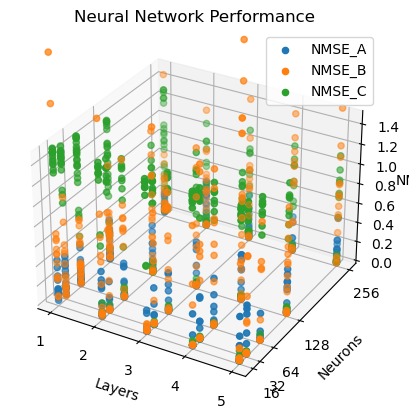

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = res_

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
for i, nmse_col in enumerate(['NMSE_A', 'NMSE_B', 'NMSE_C']):
    ax.scatter(df['layers'], df['neurons'], df[nmse_col], label=nmse_col)

# Set labels and title
ax.set_xlabel('Layers')
ax.set_ylabel('Neurons')
ax.set_zlabel('NMSE')
ax.set_title('Neural Network Performance')

# Add legend
ax.legend()
# Set custom ticks for 'neurons' axis
neuron_ticks = [16, 32, 64, 128, 256]
ax.set_yticks(neuron_ticks)

# Set z-axis limit
ax.set_zlim(0, 1.5)

# Show plot
plt.show()


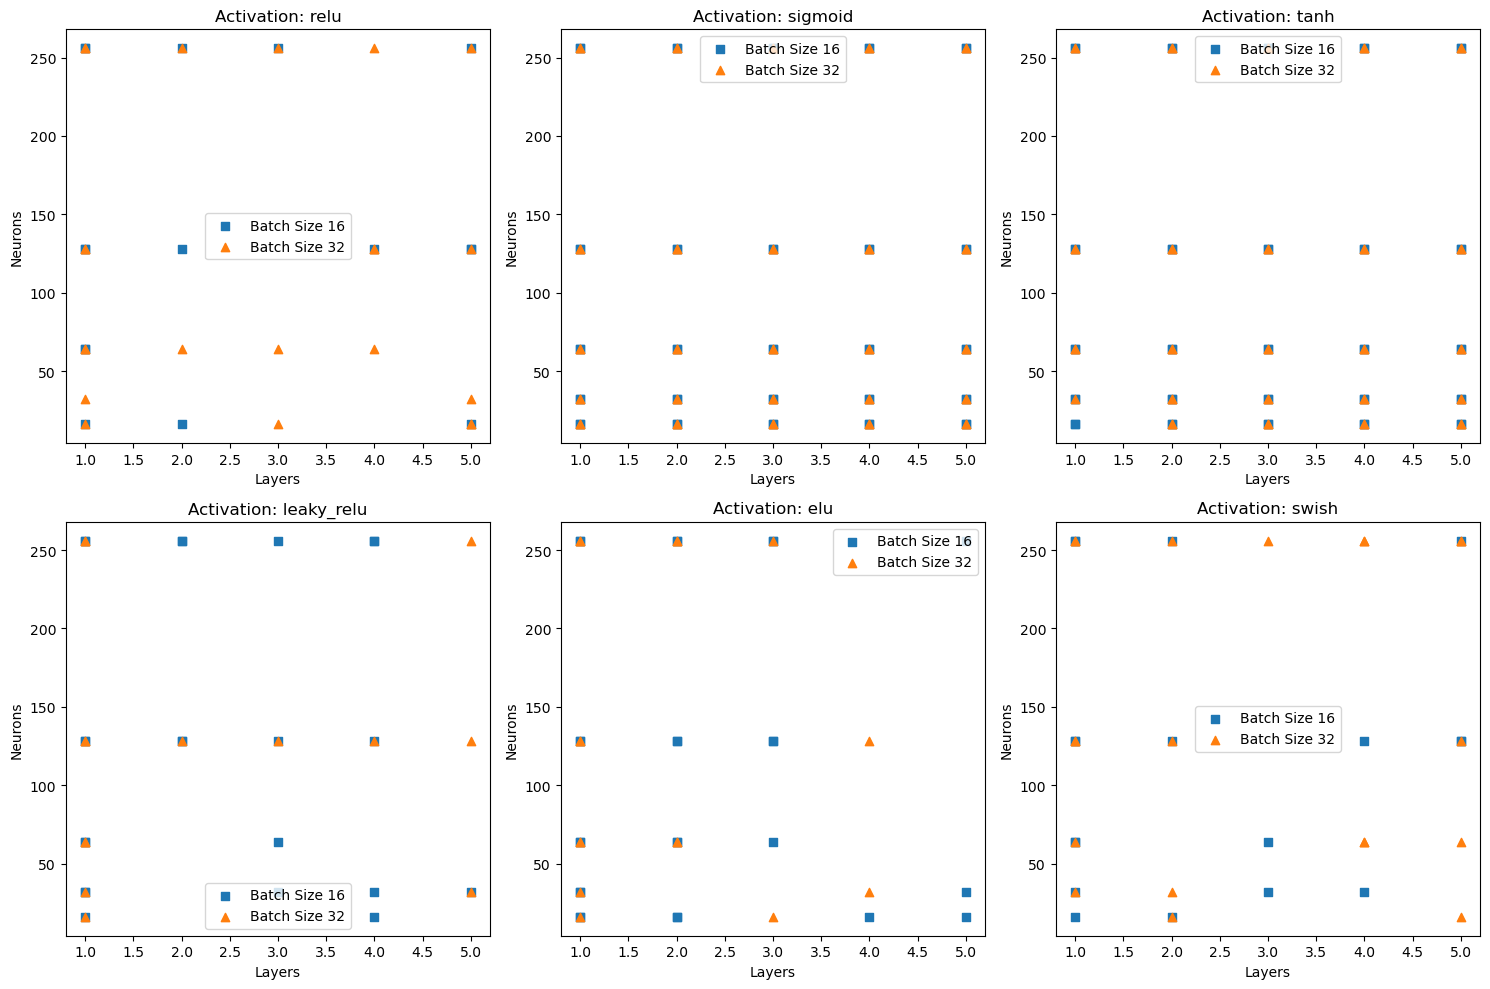

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
data = {
    'layers': [4, 6, 52, 54, 55, 72],
    'neurons': [1, 1, 64, 64, 64, 128],
    'activation': ['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid', 'sigmoid', 'relu'],
    'epochs': [50, 100, 50, 100, 100, 50],
    'batch_size': [16, 16, 16, 16, 32, 16],
    'NMSE_A': [0.087324, 0.024646, 0.000118, 0.038605, 0.025267, 0.015388],
    'NMSE_B': [0.548116, 0.498141, 0.080777, 0.196601, 0.209617, 0.137440],
    'NMSE_C': [1.505766, 1.435754, 1.385398, 1.127099, 1.348928, 0.960199]
}

# Create DataFrame
df = res_


# Create subplots for each unique activation
unique_activations = df['activation'].unique()
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over unique activations and create 3D scatter plot for each
for i, activation in enumerate(unique_activations):
    # Get data for the current activation
    activation_data = df[df['activation'] == activation]
    ax = axs[i // 3, i % 3]
    
    # Plot data points
    for batch_size, marker in zip([16, 32], ['s', '^']):
        batch_data = activation_data[activation_data['batch_size'] == batch_size]
        ax.scatter(batch_data['layers'], batch_data['neurons'], 
                   label=f'Batch Size {batch_size}', marker=marker)
    
    # Set labels and title
    ax.set_xlabel('Layers')
    ax.set_ylabel('Neurons')
    ax.set_title(f'Activation: {activation}')

    # Add legend
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


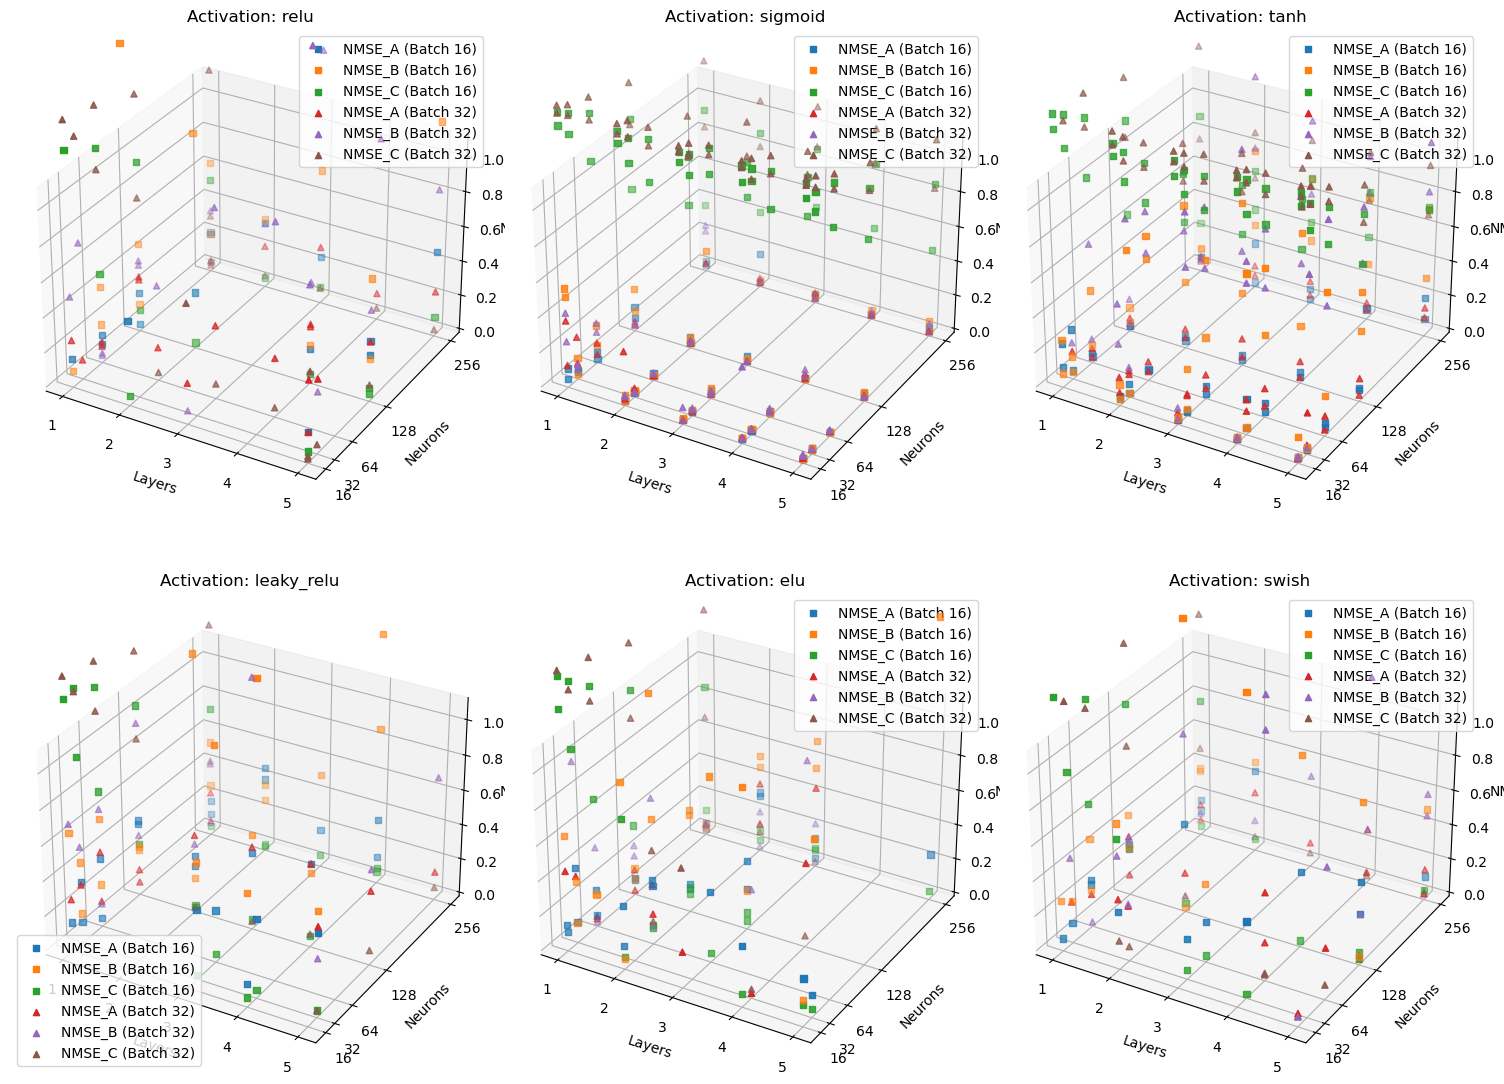

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker

# Data
data = {
    'layers': [4, 6, 52, 54, 55, 72],
    'neurons': [1, 1, 64, 64, 64, 128],
    'activation': ['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid', 'sigmoid', 'relu'],
    'epochs': [50, 100, 50, 100, 100, 50],
    'batch_size': [16, 16, 16, 16, 32, 16],
    'NMSE_A': [0.087324, 0.024646, 0.000118, 0.038605, 0.025267, 0.015388],
    'NMSE_B': [0.548116, 0.498141, 0.080777, 0.196601, 0.209617, 0.137440],
    'NMSE_C': [1.505766, 1.435754, 1.385398, 1.127099, 1.348928, 0.960199]
}

# Create DataFrame
df = res_

# Create subplots for each unique activation
unique_activations = df['activation'].unique()
fig, axs = plt.subplots(2, 3, figsize=(15, 12), subplot_kw={'projection': '3d'})

# Iterate over unique activations and create 3D scatter plot for each
for i, activation in enumerate(unique_activations):
    # Get data for the current activation
    activation_data = df[df['activation'] == activation]
    ax = axs[i // 3, i % 3]
    
    # Plot data points
    for batch_size, marker in zip([16, 32], ['s', '^']):
        batch_data = activation_data[activation_data['batch_size'] == batch_size]
        ax.scatter(batch_data['layers'], batch_data['neurons'], batch_data[f'NMSE_A'], 
                   label=f'NMSE_A (Batch {batch_size})', marker=marker)
        ax.scatter(batch_data['layers'], batch_data['neurons'], batch_data[f'NMSE_B'], 
                   label=f'NMSE_B (Batch {batch_size})', marker=marker)
        ax.scatter(batch_data['layers'], batch_data['neurons'], batch_data[f'NMSE_C'], 
                   label=f'NMSE_C (Batch {batch_size})', marker=marker)
    
    # Set labels and title
    ax.set_xlabel('Layers')
    ax.set_ylabel('Neurons')
    ax.set_zlabel('NMSE')
    ax.set_title(f'Activation: {activation}')
    
    # Set integer ticks for 'layers' axis
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    
    #layer_ticks = [1, 2, 3, 4, 5]
    #ax.set_xticks(layer_ticks)
    
    neuron_ticks = [16, 32, 64, 128, 256]
    ax.set_yticks(neuron_ticks)
    
    ax.set_zlim(0, 1.1)
    # Add legend
    ax.legend()

# Adjust layout
plt.tight_layout()

plt.savefig('3D_res+.pdf')
# Show plot
plt.show()

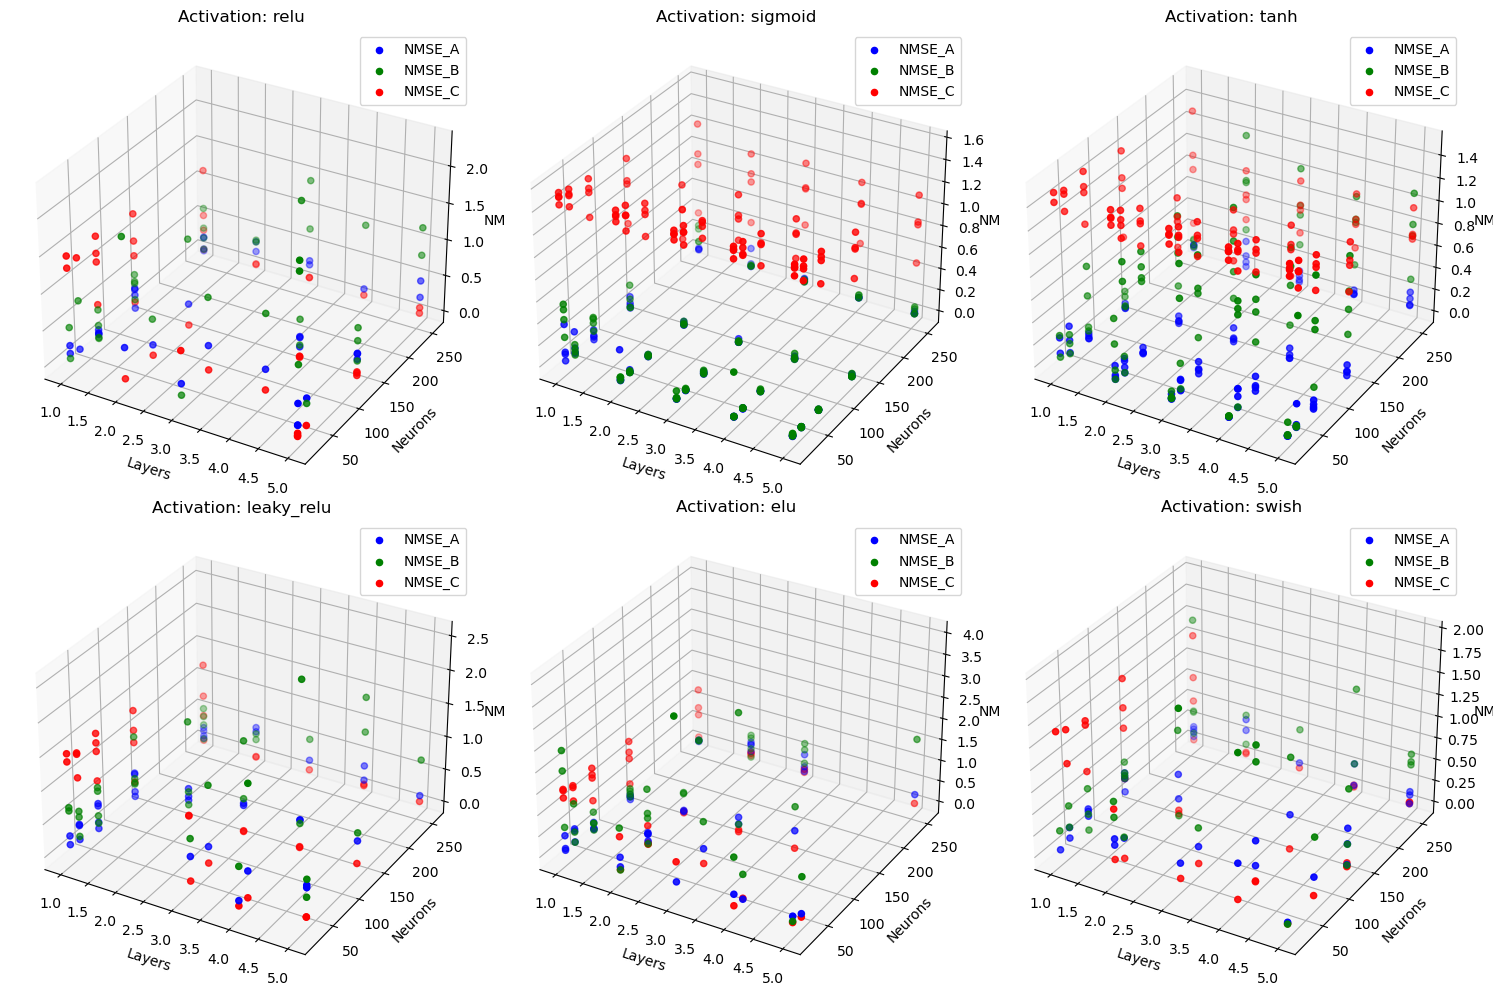

In [31]:
# Create DataFrame
df = res_#pd.DataFrame(data)

# Create subplots for each unique activation
unique_activations = df['activation'].unique()
fig, axs = plt.subplots(2, 3, figsize=(15, 10), subplot_kw={'projection': '3d'})

# Define colors for NMSE values
colors = {'NMSE_A': 'blue', 'NMSE_B': 'green', 'NMSE_C': 'red'}

# Iterate over unique activations and create 3D scatter plot for each
for i, activation in enumerate(unique_activations):
    # Get data for the current activation
    activation_data = df[df['activation'] == activation]
    ax = axs[i // 3, i % 3]
    
    # Plot data points for each NMSE value
    for nmse, color in colors.items():
        ax.scatter(activation_data['layers'], activation_data['neurons'], activation_data[nmse], 
                   label=nmse, color=color, marker='o')

    # Set labels and title
    ax.set_xlabel('Layers')
    ax.set_ylabel('Neurons')
    ax.set_zlabel('NMSE')
    ax.set_title(f'Activation: {activation}')

    # Add legend
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()